In [1]:
# Importing the libraries, dataset, and cleaning the column names

In [2]:
import pandas as pd
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import dask.dataframe as dd
import scipy.stats as st
import math
from numpy import nan
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
df = pd.read_csv("Train.csv", low_memory=False)

In [3]:
df

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [4]:
total_rows=len(df.axes[0]) 
total_cols=len(df.axes[1])
print("Number of Rows: "+str(total_rows))
print("Number of Columns: "+str(total_cols))

sz = Path('Train.csv').stat().st_size
gb_sz = sz/1000000000
print("The file is", sz, "bytes or", gb_sz, "gigabytes")

Number of Rows: 13647309
Number of Columns: 48
The file is 2292759599 bytes or 2.292759599 gigabytes


In [5]:
df.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [4]:
df.rename(columns={'fecha_dato':'Partitioned Date',
                    'ncodpers':'Customer Code',
                    'ind_empleado':'Employee Index',
                    'pais_residencia':'Country Residence',
                    'sexo':'Sex',
                    'age':'Age',
                    'fecha_alta':'Date Joined',
                    'ind_nuevo':'New Customer Index',
                    'antiguedad':'Seniority',
                    'indrel':'Primary Customer',
                    'ult_fec_cli_1t':'Last Date as Primary Customer',
                    'indrel_1mes':'Customer Type at Beginning of Month',
                    'tiprel_1mes':'Customer Relation Type at Beginning of Month',
                    'indresi':'Resident Country is Bank Country',
                    'indext':'Birth Country Different Than Bank Country',
                    'conyuemp':'Spouse Index', 
                    'canal_entrada':'Channel Used to Join', 
                    'indfall':'Deceased', 
                    'tipodom':'Address Type', 
                    'cod_prov':'Province Code',
                    'nomprov':'Province Name', 
                    'ind_actividad_cliente':'Activity Index', 
                    'renta':'Gross Household Income', 
                    'segmento':'Segmentation',
                    'ind_ahor_fin_ult1':'Savings Account',
                    'ind_aval_fin_ult1':'Guarantees', 
                    'ind_cco_fin_ult1':'Current Accounts',
                    'ind_cder_fin_ult1':'Derivative Account', 
                    'ind_cno_fin_ult1':'Payroll Account', 
                    'ind_ctju_fin_ult1':'Junior Account',
                    'ind_ctma_fin_ult1':'More Partiuclar Account', 
                    'ind_ctop_fin_ult1':'Particular Account', 
                    'ind_ctpp_fin_ult1':'Particular Plus Account',
                    'ind_deco_fin_ult1':'Short-Term Deposits',
                    'ind_deme_fin_ult1':'Medium-Term Deposits', 
                    'ind_dela_fin_ult1':'Long-Term Deposits',
                    'ind_ecue_fin_ult1':'E-Account',
                    'ind_fond_fin_ult1':'Funds', 
                    'ind_hip_fin_ult1':'Mortgage',
                    'ind_plan_fin_ult1':'Pensions', 
                    'ind_pres_fin_ult1':'Loans', 
                    'ind_reca_fin_ult1':'Taxes',
                    'ind_tjcr_fin_ult1':'Credit Card', 
                    'ind_valo_fin_ult1':'Securities', 
                    'ind_viv_fin_ult1':'Home Account',
                    'ind_nomina_ult1':'Payroll', 
                    'ind_nom_pens_ult1':'Pension', 
                    'ind_recibo_ult1':'Direct Debit'}, inplace = True)

In [7]:
df

,Partitioned Date,Customer Code,Employee Index,Country Residence,Sex,Age,Date Joined,New Customer Index,Seniority,Primary Customer,...,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pension,Direct Debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [ ]:
# These next few lines of code will be testing different functions and getting an overall understanding of the dataset.

In [8]:
df.dtypes

Partitioned Date                                 object
Customer Code                                     int64
Employee Index                                   object
Country Residence                                object
Sex                                              object
Age                                              object
Date Joined                                      object
New Customer Index                              float64
Seniority                                        object
Primary Customer                                float64
Last Date as Primary Customer                    object
Customer Type at Beginning of Month              object
Customer Relation Type at Beginning of Month     object
Resident Country is Bank Country                 object
Birth Country Different Than Bank Country        object
Spouse Index                                     object
Channel Used to Join                             object
Deceased                                        

In [9]:
 df.isna().sum()

Partitioned Date                                       0
Customer Code                                          0
Employee Index                                     27734
Country Residence                                  27734
Sex                                                27804
Age                                                    0
Date Joined                                        27734
New Customer Index                                 27734
Seniority                                              0
Primary Customer                                   27734
Last Date as Primary Customer                   13622516
Customer Type at Beginning of Month               149781
Customer Relation Type at Beginning of Month      149781
Resident Country is Bank Country                   27734
Birth Country Different Than Bank Country          27734
Spouse Index                                    13645501
Channel Used to Join                              186126
Deceased                       

In [10]:
df['Gross Household Income'].mean()

134254.31823814093

In [11]:
df['Gross Household Income'].median()

101850.0

In [12]:
min(df['Gross Household Income'])

1202.73

In [13]:
max(df['Gross Household Income'])

28894395.51

In [14]:
df['Sex'].mode()

0    V
Name: Sex, dtype: object

In [15]:
df['Customer Type at Beginning of Month'].mode()

0    1.0
Name: Customer Type at Beginning of Month, dtype: object

In [16]:
df['Customer Type at Beginning of Month'].unique()

array(['1.0', '1', nan, '3.0', '3', '2', '2.0', '4.0', 'P', '4'],
      dtype=object)

In [17]:
df['Customer Type at Beginning of Month'].nunique()

9

In [ ]:
# These next few lines of code will be trying to determine the outliers of Gross Household Income, and how to deal with them.

In [18]:
df['Gross Household Income'].nlargest(n=100)

327991     28894395.51
332909     28894395.51
344184     28894395.51
903902     28894395.51
919787     28894395.51
              ...     
2500896    24253236.93
2531661    24253236.93
3160166    24253236.93
3906721    24253236.93
4387351    24253236.93
Name: Gross Household Income, Length: 100, dtype: float64

In [19]:
df['Gross Household Income'].nsmallest(n=100)

280346     1202.73
950236     1202.73
1570122    1202.73
2199247    1202.73
2823646    1202.73
            ...   
5539437    3796.86
5766988    3796.86
5783021    3796.86
6856407    3796.86
6868095    3796.86
Name: Gross Household Income, Length: 100, dtype: float64

C:\Users\Colt\AppData\Local\Temp\ipykernel_7580\3797560459.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Gross Household Income'])


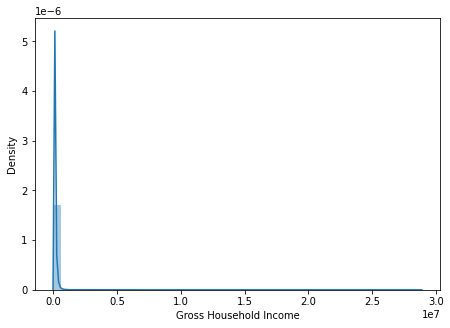

In [20]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(df['Gross Household Income'])
plt.show()

In [21]:
print("Highest allowed",df['Gross Household Income'].mean() + 3*df['Gross Household Income'].std())
print("Lowest allowed",df['Gross Household Income'].mean() - 3*df['Gross Household Income'].std())

Highest allowed 826115.0347038
Lowest allowed -557606.3982275182


In [22]:
df[(df['Gross Household Income'] > 826115.03) | (df['Gross Household Income'] < 0.)]

,Partitioned Date,Customer Code,Employee Index,Country Residence,Sex,Age,Date Joined,New Customer Index,Seniority,Primary Customer,...,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pension,Direct Debit
467,2015-01-28,1050426,N,ES,H,25,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
822,2015-01-28,1052362,N,ES,V,22,2012-08-17,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1151,2015-01-28,1051383,N,ES,V,53,2012-08-13,0.0,35,1.0,...,0,0,0,1,0,0,0,0.0,0.0,1
1742,2015-01-28,1048801,N,ES,H,23,2012-08-09,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1744,2015-01-28,1048803,N,ES,V,26,2012-08-09,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13644850,2016-05-28,1164027,N,ES,V,27,2013-08-12,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1
13645267,2016-05-28,1164544,N,ES,H,22,2013-08-13,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13645403,2016-05-28,1164697,N,ES,V,23,2013-08-13,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13645545,2016-05-28,1167675,N,ES,H,22,2013-08-20,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [23]:
new_df = df[(df['Gross Household Income'] < 250000) & (df['Gross Household Income'] > 0)]

In [24]:
upper_limit = df['Gross Household Income'].mean() + 3*df['Gross Household Income'].std()
lower_limit = df['Gross Household Income'].mean() - 3*df['Gross Household Income'].std()

In [25]:
df['Gross Household Income'] = np.where(df['Gross Household Income']>upper_limit,
    upper_limit, np.where(df['Gross Household Income']<lower_limit,
    lower_limit, df['Gross Household Income']))

In [26]:
df['Gross Household Income'].describe()

count    1.085293e+07
mean     1.297296e+05
std      1.013358e+05
min      1.202730e+03
25%      6.871098e+04
50%      1.018500e+05
75%      1.559560e+05
max      8.261150e+05
Name: Gross Household Income, dtype: float64

<AxesSubplot:>

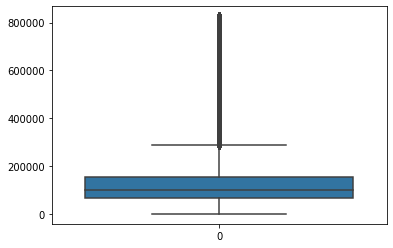

In [27]:
sns.boxplot(df['Gross Household Income'])

<AxesSubplot:>

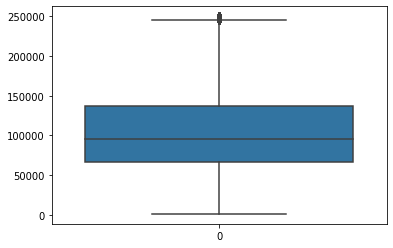

In [28]:
sns.boxplot(new_df['Gross Household Income'])

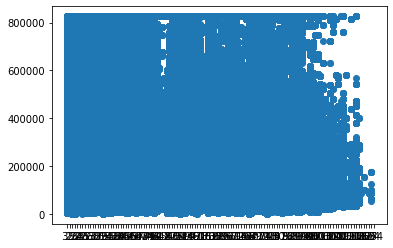

In [29]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Age"],
df["Gross Household Income"])

In [ ]:
# The next few lines of code are more mining and understanding.

In [30]:
df['Country Residence'].unique()

array(['ES', nan, 'CA', 'CH', 'CL', 'IE', 'AT', 'NL', 'FR', 'GB', 'DE',
       'DO', 'BE', 'AR', 'VE', 'US', 'MX', 'BR', 'IT', 'EC', 'PE', 'CO',
       'HN', 'FI', 'SE', 'AL', 'PT', 'MZ', 'CN', 'TW', 'PL', 'IN', 'CR',
       'NI', 'HK', 'AD', 'CZ', 'AE', 'MA', 'GR', 'PR', 'RO', 'IL', 'RU',
       'GT', 'GA', 'NO', 'SN', 'MR', 'UA', 'BG', 'PY', 'EE', 'SV', 'ET',
       'CM', 'SA', 'CI', 'QA', 'LU', 'PA', 'BA', 'BO', 'AU', 'BY', 'KE',
       'SG', 'HR', 'MD', 'SK', 'TR', 'AO', 'CU', 'GQ', 'EG', 'ZA', 'DK',
       'UY', 'GE', 'TH', 'DZ', 'LB', 'JP', 'NG', 'PK', 'TN', 'TG', 'KR',
       'GH', 'RS', 'VN', 'PH', 'KW', 'NZ', 'MM', 'KH', 'GI', 'SL', 'GN',
       'GW', 'OM', 'CG', 'LV', 'LT', 'ML', 'MK', 'HU', 'IS', 'LY', 'CF',
       'GM', 'KZ', 'CD', 'BZ', 'ZW', 'DJ', 'JM', 'BM', 'MT'], dtype=object)

In [31]:
df['Funds'].mean()

0.018485988702974337

In [32]:
df['Funds'].unique()

array([0, 1], dtype=int64)

In [33]:
df['Pension'].unique()

array([ 0.,  1., nan])

In [34]:
df['Pensions'].unique()

array([0, 1], dtype=int64)

In [35]:
df['Particular Account'].unique()

array([0, 1], dtype=int64)

In [36]:
df['Particular Plus Account'].unique()

array([0, 1], dtype=int64)

In [37]:
print("Sex", df["Sex"].unique())
print("Age", df["Age"].unique())
print("Seniority", df['Seniority'].unique())
print("Primary Customer", df["Primary Customer"].unique())
print('Activity Index', df["Activity Index"].unique())
print('Savings Account', df["Savings Account"].unique())
print('Guarantees', df["Guarantees"].unique())
print('Current Accounts', df["Current Accounts"].unique())
print('Derivative Account', df["Derivative Account"].unique())
print('Payroll Account', df["Payroll Account"].unique())
print('Junior Account', df["Junior Account"].unique())
print('More Partiuclar Account', df["More Partiuclar Account"].unique())
print('Particular Account', df["Particular Account"].unique())
print('Particular Plus Account', df["Particular Plus Account"].unique())
print('Short-Term Deposits', df["Short-Term Deposits"].unique())
print('Medium-Term Deposits', df["Medium-Term Deposits"].unique())
print("Long-Term Deposits", df["Long-Term Deposits"].unique())
print("E-Account", df["E-Account"].unique())
print("Funds", df["Funds"].unique())
print("Mortgage", df["Mortgage"].unique())
print("Pensions", df["Pensions"].unique())
print("Loans", df["Loans"].unique())
print("Taxes", df["Taxes"].unique())
print("Credit Card", df["Credit Card"].unique())
print("Securities", df["Securities"].unique())
print("Home Account", df["Home Account"].unique())
print("Payroll", df["Payroll"].unique())
print("Pension", df["Pension"].unique())
print("Direct Debit", df["Direct Debit"].unique())

Sex ['H' 'V' nan]
Age [' 35' ' 23' ' 22' ' 24' ' 65' ' 28' ' 25' ' 26' ' 53' ' 27' ' 32' ' 37'
 ' 31' ' 39' ' 63' ' 33' ' 55' ' 42' ' 58' ' 38' ' 50' ' 30' ' 45' ' 44'
 ' 36' ' 29' ' 60' ' 57' ' 67' ' 47' ' NA' ' 34' ' 48' ' 46' ' 54' ' 84'
 ' 15' ' 12' '  8' '  6' ' 83' ' 40' ' 77' ' 69' ' 52' ' 59' ' 43' ' 10'
 '  9' ' 49' ' 41' ' 51' ' 78' ' 16' ' 11' ' 73' ' 62' ' 66' ' 17' ' 68'
 ' 82' ' 95' ' 96' ' 56' ' 61' ' 79' ' 72' ' 14' ' 19' ' 13' ' 86' ' 64'
 ' 20' ' 89' ' 71' '  7' ' 70' ' 74' ' 21' ' 18' ' 75' '  4' ' 80' ' 81'
 '  5' ' 76' ' 92' ' 93' ' 85' ' 91' ' 87' ' 90' ' 94' ' 99' ' 98' ' 88'
 ' 97' '100' '101' '106' '103' '  3' '  2' '102' '104' '111' '107' '109'
 '105' '112' '115' '110' '116' '108' '113' '126' '117' '163' '127' '114'
 '164']
Seniority ['      6' '     35' '     34' '     NA' '     33' '     31' '     21'
 '     16' '     27' '      9' '     22' '     13' '     29' '      8'
 '     11' '     10' '     28' '     24' '      7' '     25' '     14'
 '     26' '     

In [38]:
df.count()

Partitioned Date                                13647309
Customer Code                                   13647309
Employee Index                                  13619575
Country Residence                               13619575
Sex                                             13619505
Age                                             13647309
Date Joined                                     13619575
New Customer Index                              13619575
Seniority                                       13647309
Primary Customer                                13619575
Last Date as Primary Customer                      24793
Customer Type at Beginning of Month             13497528
Customer Relation Type at Beginning of Month    13497528
Resident Country is Bank Country                13619575
Birth Country Different Than Bank Country       13619575
Spouse Index                                        1808
Channel Used to Join                            13461183
Deceased                       

In [39]:
print("Primary Customer", df["Primary Customer"].sum())
print('Activity Index', df["Activity Index"].sum())
print('Savings Account', df["Savings Account"].sum())
print('Guarantees', df["Guarantees"].sum())
print('Current Accounts', df["Current Accounts"].sum())
print('Derivative Account', df["Derivative Account"].sum())
print('Payroll Account', df["Payroll Account"].sum())
print('Junior Account', df["Junior Account"].sum())
print('Particular Account', df["Particular Account"].sum())
print('Short-Term Deposits', df["Short-Term Deposits"].sum())
print('Medium-Term Deposits', df["Medium-Term Deposits"].sum())
print("Long-Term Deposits", df["Long-Term Deposits"].sum())
print("E-Account", df["E-Account"].sum())
print("Funds", df["Funds"].sum())
print("Mortgage", df["Mortgage"].sum())
print("Pensions", df["Pensions"].sum())
print("Loans", df["Loans"].sum())
print("Taxes", df["Taxes"].sum())
print("Credit Card", df["Credit Card"].sum())
print("Securities", df["Securities"].sum())
print("Home Account", df["Home Account"].sum())
print("Payroll", df["Payroll"].sum())
print("Pension", df["Pension"].sum())
print("Direct Debit", df["Direct Debit"].sum())

Primary Customer 16049289.0
Activity Index 6235185.0
Savings Account 1396
Guarantees 316
Current Accounts 8945588
Derivative Account 5376
Payroll Account 1103620
Junior Account 129297
Particular Account 1760616
Short-Term Deposits 24275
Medium-Term Deposits 22668
Long-Term Deposits 586381
E-Account 1129227
Funds 252284
Mortgage 80336
Pensions 125159
Loans 35857
Taxes 716980
Credit Card 605786
Securities 349475
Home Account 52511
Payroll 745961.0
Pension 810085.0
Direct Debit 1745712


In [40]:
print("Primary Customer", df["Primary Customer"].mean())
print('Activity Index', df["Activity Index"].mean())
print('Gross Household Income', df['Gross Household Income'].mean())
print('Savings Account', df["Savings Account"].mean())
print('Guarantees', df["Guarantees"].mean())
print('Current Accounts', df["Current Accounts"].mean())
print('Derivative Account', df["Derivative Account"].mean())
print('Payroll Account', df["Payroll Account"].mean())
print('Junior Account', df["Junior Account"].mean())
print('More Partiuclar Account', df["More Partiuclar Account"].mean())
print('Particular Account', df["Particular Account"].mean())
print('Particular Plus Account', df["Particular Plus Account"].mean())
print('Short-Term Deposits', df["Short-Term Deposits"].mean())
print('Medium-Term Deposits', df["Medium-Term Deposits"].mean())
print("Long-Term Deposits", df["Long-Term Deposits"].mean())
print("E-Account", df["E-Account"].mean())
print("Funds", df["Funds"].mean())
print("Mortgage", df["Mortgage"].mean())
print("Pensions", df["Pensions"].mean())
print("Loans", df["Loans"].mean())
print("Taxes", df["Taxes"].mean())
print("Credit Card", df["Credit Card"].mean())
print("Securities", df["Securities"].mean())
print("Home Account", df["Home Account"].mean())
print("Payroll", df["Payroll"].mean())
print("Pension", df["Pension"].mean())
print("Direct Debit", df["Direct Debit"].mean())

Primary Customer 1.1783986651565852
Activity Index 0.45781054107782365
Gross Household Income 129729.61926942572
Savings Account 0.00010229122825606132
Guarantees 2.3154747943349124e-05
Current Accounts 0.6554836561552171
Derivative Account 0.0003939238131121674
Payroll Account 0.08086722444695874
Junior Account 0.00947417545832662
More Partiuclar Account 0.00972660617562041
Particular Account 0.12900829020578342
Particular Plus Account 0.043305826811717976
Short-Term Deposits 0.0017787389440658229
Medium-Term Deposits 0.0016609867923412594
Long-Term Deposits 0.042966785613193045
E-Account 0.0827435650500769
Funds 0.018485988702974337
Mortgage 0.005886581742964858
Pensions 0.00917096549949884
Loans 0.002627404420900853
Taxes 0.05253636449500777
Credit Card 0.04438867765066359
Securities 0.025607612460449163
Home Account 0.0038477182571303985
Payroll 0.054724344348271614
Pension 0.05942853646687911
Direct Debit 0.127916206777468


In [41]:
print("Primary Customer", df["Primary Customer"].median())
print('Activity Index', df["Activity Index"].median())
print('Gross Household Income', df['Gross Household Income'].median())
print('Savings Account', df["Savings Account"].median())
print('Guarantees', df["Guarantees"].median())
print('Current Accounts', df["Current Accounts"].median())
print('Derivative Account', df["Derivative Account"].median())
print('Payroll Account', df["Payroll Account"].median())
print('Junior Account', df["Junior Account"].median())
print('More Partiuclar Account', df["More Partiuclar Account"].median())
print('Particular Account', df["Particular Account"].median())
print('Particular Plus Account', df["Particular Plus Account"].median())
print('Short-Term Deposits', df["Short-Term Deposits"].median())
print('Medium-Term Deposits', df["Medium-Term Deposits"].median())
print("Long-Term Deposits", df["Long-Term Deposits"].median())
print("E-Account", df["E-Account"].median())
print("Funds", df["Funds"].median())
print("Mortgage", df["Mortgage"].median())
print("Pensions", df["Pensions"].median())
print("Loans", df["Loans"].median())
print("Taxes", df["Taxes"].median())
print("Credit Card", df["Credit Card"].median())
print("Securities", df["Securities"].median())
print("Home Account", df["Home Account"].median())
print("Payroll", df["Payroll"].median())
print("Pension", df["Pension"].median())
print("Direct Debit", df["Direct Debit"].median())

Primary Customer 1.0
Activity Index 0.0
Gross Household Income 101850.0
Savings Account 0.0
Guarantees 0.0
Current Accounts 1.0
Derivative Account 0.0
Payroll Account 0.0
Junior Account 0.0
More Partiuclar Account 0.0
Particular Account 0.0
Particular Plus Account 0.0
Short-Term Deposits 0.0
Medium-Term Deposits 0.0
Long-Term Deposits 0.0
E-Account 0.0
Funds 0.0
Mortgage 0.0
Pensions 0.0
Loans 0.0
Taxes 0.0
Credit Card 0.0
Securities 0.0
Home Account 0.0
Payroll 0.0
Pension 0.0
Direct Debit 0.0


In [ ]:
# Creating scatterplots with some of the variables, comparing it with Gross Household Income. At this point, I thought
#Gross Household Income would be a good indicator of profit for the credit union.

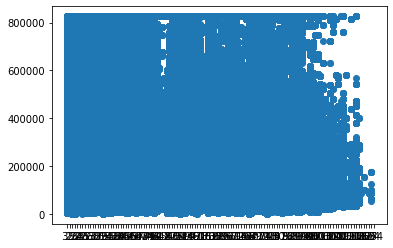

In [49]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Age"],
df["Gross Household Income"])

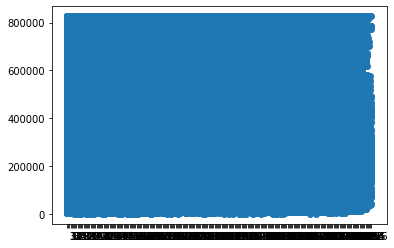

In [50]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Seniority"],
df["Gross Household Income"])

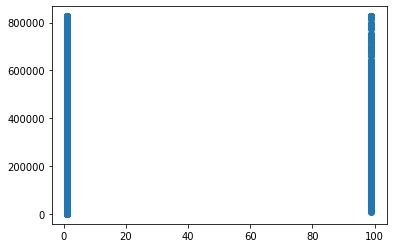

In [51]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Primary Customer"],
df["Gross Household Income"])

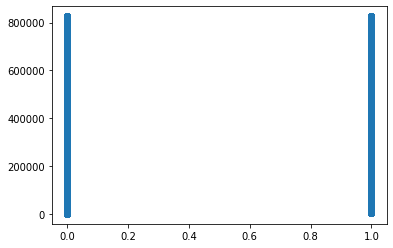

In [52]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Activity Index"],
df["Gross Household Income"])

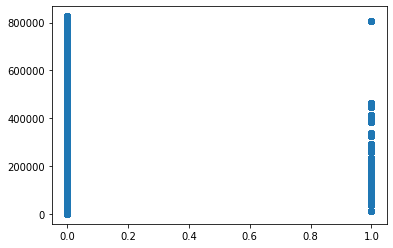

In [53]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Savings Account"],
df["Gross Household Income"])

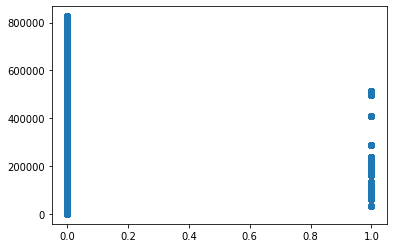

In [54]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Guarantees"],
df["Gross Household Income"])

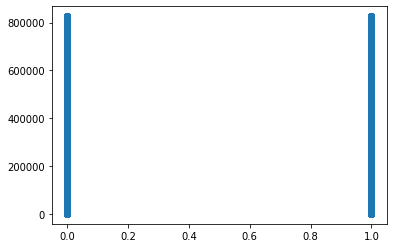

In [55]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Current Accounts"],
df["Gross Household Income"])

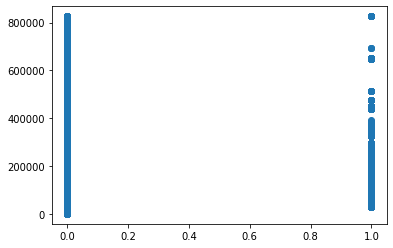

In [56]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Derivative Account"],
df["Gross Household Income"])

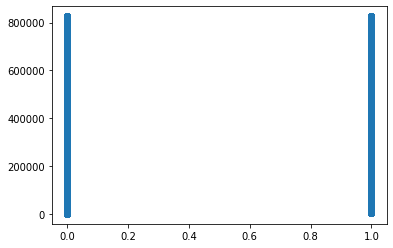

In [57]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Payroll Account"],
df["Gross Household Income"])

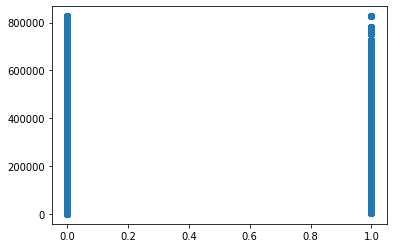

In [58]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Junior Account"],
df["Gross Household Income"])

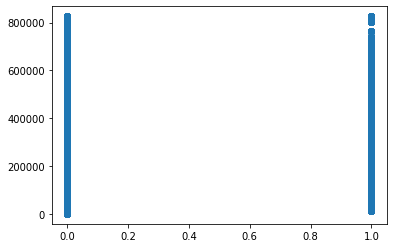

In [59]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["More Partiuclar Account"],
df["Gross Household Income"])

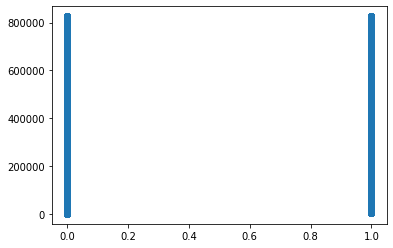

In [60]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Particular Account"],
df["Gross Household Income"])

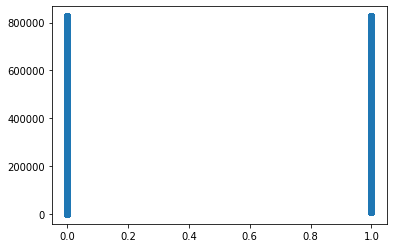

In [61]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Particular Plus Account"],
df["Gross Household Income"])

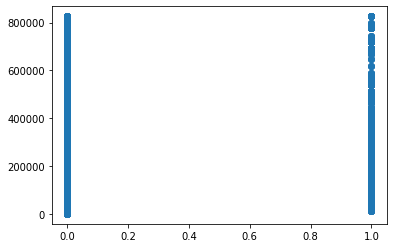

In [62]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Short-Term Deposits"],
df["Gross Household Income"])

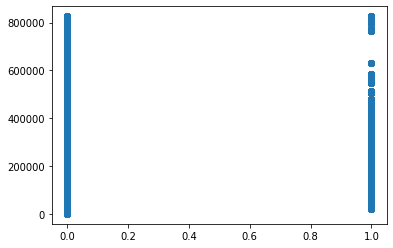

In [63]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Medium-Term Deposits"],
df["Gross Household Income"])

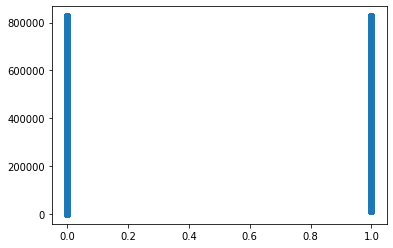

In [64]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Long-Term Deposits"],
df["Gross Household Income"])

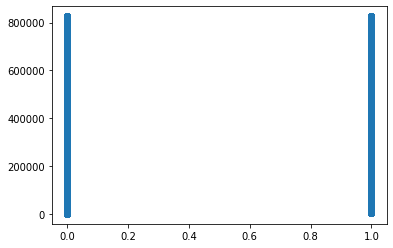

In [65]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["E-Account"],
df["Gross Household Income"])

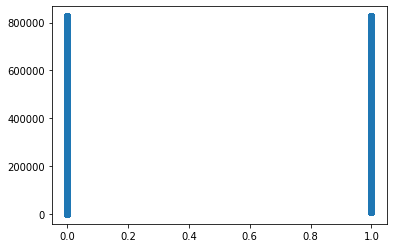

In [66]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Funds"],
df["Gross Household Income"])

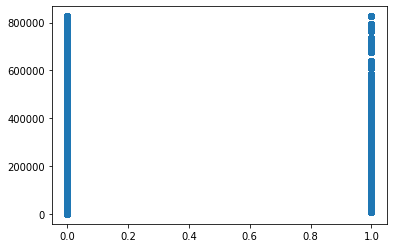

In [67]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Mortgage"],
df["Gross Household Income"])

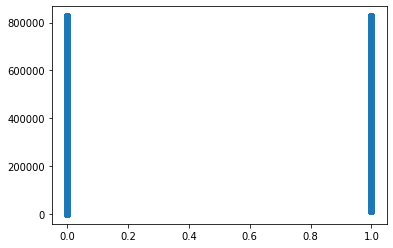

In [68]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Pensions"],
df["Gross Household Income"])

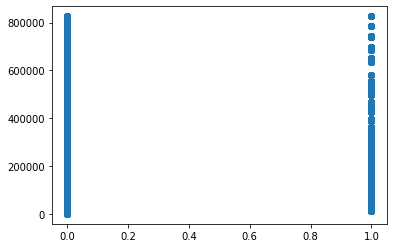

In [69]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Loans"],
df["Gross Household Income"])

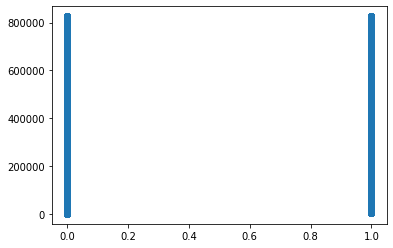

In [70]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Taxes"],
df["Gross Household Income"])

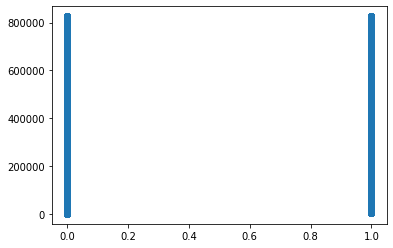

In [71]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Credit Card"],
df["Gross Household Income"])

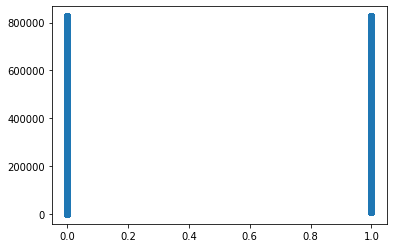

In [72]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Securities"],
df["Gross Household Income"])

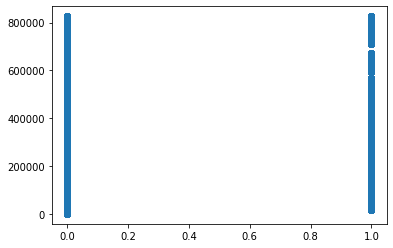

In [73]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Home Account"],
df["Gross Household Income"])

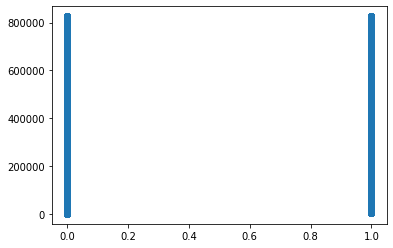

In [74]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Payroll"],
df["Gross Household Income"])

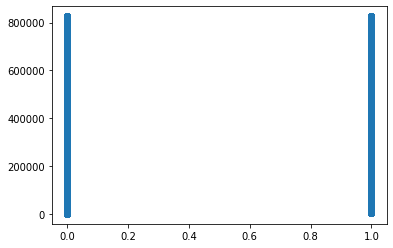

In [75]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Pension"],
df["Gross Household Income"])

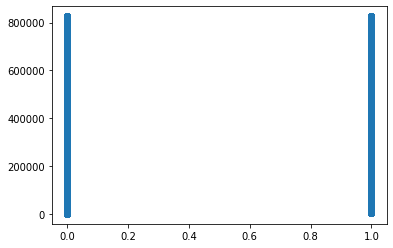

In [76]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(
df["Direct Debit"],
df["Gross Household Income"])

In [ ]:
# Some of the data had to be cleaned and transformed to be able to have analysis done on it.
#One way of working around NA values is by filling them with the medians of each variable.  This keeps the variables
#essentially the same with also giving us data that can be analyzed in many different ways.  The number of NA values is almost
#negligible compared to the full amount of values per column.  Most having anywhere from 0.1% - 1% of NA values.  However, some
#do have more than 1% NA values, one variable being close to 20%.

In [5]:
df['Sex'].unique()

array(['H', 'V', nan], dtype=object)

In [6]:
df['Sex'] = df['Sex'].replace(['H'],['1'])
df['Sex'] = df['Sex'].replace(['V'],['0'])

In [7]:
df['Sex'] = df['Sex'].astype(float)

In [8]:
print('Sex Mean', df['Sex'].mean())
print('Sex Median', df['Sex'].median())

Sex Mean 0.4548809226179659
Sex Median 0.0


In [9]:
df['Sex'] = df['Sex'].fillna(0)

In [10]:
df['Sex'].unique()

array([1., 0.])

In [11]:
df['Age'].unique()

array([' 35', ' 23', ' 22', ' 24', ' 65', ' 28', ' 25', ' 26', ' 53',
       ' 27', ' 32', ' 37', ' 31', ' 39', ' 63', ' 33', ' 55', ' 42',
       ' 58', ' 38', ' 50', ' 30', ' 45', ' 44', ' 36', ' 29', ' 60',
       ' 57', ' 67', ' 47', ' NA', ' 34', ' 48', ' 46', ' 54', ' 84',
       ' 15', ' 12', '  8', '  6', ' 83', ' 40', ' 77', ' 69', ' 52',
       ' 59', ' 43', ' 10', '  9', ' 49', ' 41', ' 51', ' 78', ' 16',
       ' 11', ' 73', ' 62', ' 66', ' 17', ' 68', ' 82', ' 95', ' 96',
       ' 56', ' 61', ' 79', ' 72', ' 14', ' 19', ' 13', ' 86', ' 64',
       ' 20', ' 89', ' 71', '  7', ' 70', ' 74', ' 21', ' 18', ' 75',
       '  4', ' 80', ' 81', '  5', ' 76', ' 92', ' 93', ' 85', ' 91',
       ' 87', ' 90', ' 94', ' 99', ' 98', ' 88', ' 97', '100', '101',
       '106', '103', '  3', '  2', '102', '104', '111', '107', '109',
       '105', '112', '115', '110', '116', '108', '113', '126', '117',
       '163', '127', '114', '164'], dtype=object)

In [12]:
df['Age'] = df['Age'].replace([' NA'],[' 39'])

In [13]:
df['Age'] = df['Age'].astype(int)

In [14]:
print(df['Age'].mean())
print(df['Age'].median())

40.179063945866545
39.0


In [15]:
df['Age'].unique()

array([ 35,  23,  22,  24,  65,  28,  25,  26,  53,  27,  32,  37,  31,
        39,  63,  33,  55,  42,  58,  38,  50,  30,  45,  44,  36,  29,
        60,  57,  67,  47,  34,  48,  46,  54,  84,  15,  12,   8,   6,
        83,  40,  77,  69,  52,  59,  43,  10,   9,  49,  41,  51,  78,
        16,  11,  73,  62,  66,  17,  68,  82,  95,  96,  56,  61,  79,
        72,  14,  19,  13,  86,  64,  20,  89,  71,   7,  70,  74,  21,
        18,  75,   4,  80,  81,   5,  76,  92,  93,  85,  91,  87,  90,
        94,  99,  98,  88,  97, 100, 101, 106, 103,   3,   2, 102, 104,
       111, 107, 109, 105, 112, 115, 110, 116, 108, 113, 126, 117, 163,
       127, 114, 164])

In [16]:
df['Seniority'].unique()

array(['      6', '     35', '     34', '     NA', '     33', '     31',
       '     21', '     16', '     27', '      9', '     22', '     13',
       '     29', '      8', '     11', '     10', '     28', '     24',
       '      7', '     25', '     14', '     26', '     12', '     23',
       '      1', '     18', '      4', '      3', '     17', '     32',
       '     30', '     20', '     15', '     19', '    157', '     36',
       '      5', '     40', '     38', '     37', '     39', '      0',
       '      2', '     47', '     44', '     42', '     46', '     45',
       '     43', '     41', '     57', '     48', '     52', '     49',
       '     50', '     56', '     58', '     51', '     55', '     54',
       '     53', '     59', '     62', '     61', '     60', '     63',
       '    139', '    165', '    118', '    164', '    142', '     94',
       '    159', '    143', '    105', '    151', '    162', '    137',
       '    150', '    128', '    122', '    156', 

In [17]:
df['Seniority'] = df['Seniority'].replace(['     NA'],['50'])

In [18]:
df['Seniority'] = df['Seniority'].replace(['-999999'],['50'])

In [19]:
df['Seniority'] = df['Seniority'].astype(int)

In [20]:
print(df['Seniority'].mean())
print(df['Seniority'].median())

79.32246877388063
50.0


In [21]:
df['Seniority'].unique()

array([  6,  35,  34,  50,  33,  31,  21,  16,  27,   9,  22,  13,  29,
         8,  11,  10,  28,  24,   7,  25,  14,  26,  12,  23,   1,  18,
         4,   3,  17,  32,  30,  20,  15,  19, 157,  36,   5,  40,  38,
        37,  39,   0,   2,  47,  44,  42,  46,  45,  43,  41,  57,  48,
        52,  49,  56,  58,  51,  55,  54,  53,  59,  62,  61,  60,  63,
       139, 165, 118, 164, 142,  94, 159, 143, 105, 151, 162, 137, 150,
       128, 122, 156, 119, 160,  79,  95, 132, 161,  98, 127,  72, 155,
       108, 163, 102, 148, 115, 146, 107,  81, 216, 135,  92, 121, 198,
       134,  93, 140, 110, 120, 147, 116,  64,  77,  85,  99,  78, 100,
       113, 154, 166, 133, 124, 141,  66, 117,  86, 193,  80, 144,  87,
       126, 158, 101, 235,  88, 145, 103, 149, 109, 131,  97,  68,  84,
       232, 125, 177, 112,  96,  69, 171, 167, 104,  76,  82, 152,  70,
       138, 169,  65, 129, 190, 114, 111, 176, 153,  89, 136,  83, 123,
       187, 106, 231, 189, 217, 172, 199, 173, 174, 209, 180, 17

In [22]:
df['Resident Country is Bank Country'].unique()

array(['S', nan, 'N'], dtype=object)

In [23]:
df['Resident Country is Bank Country'] = df['Resident Country is Bank Country'].replace(['N'],['0'])

In [24]:
df['Resident Country is Bank Country'] = df['Resident Country is Bank Country'].replace(['S'],['1'])

In [25]:
df['Resident Country is Bank Country'] = df['Resident Country is Bank Country'].astype(float)

In [26]:
df['Resident Country is Bank Country'] = df['Resident Country is Bank Country'].fillna(1)

In [27]:
df['Resident Country is Bank Country'].unique()

array([1., 0.])

In [28]:
df['Birth Country Different Than Bank Country'].unique()

array(['N', 'S', nan], dtype=object)

In [29]:
df['Birth Country Different Than Bank Country'] = df['Birth Country Different Than Bank Country'].replace(['N'],['0'])

In [30]:
df['Birth Country Different Than Bank Country'] = df['Birth Country Different Than Bank Country'].replace(['S'],['1'])

In [31]:
df['Birth Country Different Than Bank Country'] = df['Birth Country Different Than Bank Country'].astype(float)

In [32]:
df['Birth Country Different Than Bank Country'] = df['Birth Country Different Than Bank Country'].fillna(0)

In [33]:
df['Birth Country Different Than Bank Country'].unique()

array([0., 1.])

In [34]:
df['Spouse Index'].unique()

array([nan, 'N', 'S'], dtype=object)

In [35]:
df['Spouse Index'] = df['Spouse Index'].replace(['N'],['0'])

In [36]:
df['Spouse Index'] = df['Spouse Index'].replace(['S'],['1'])

In [37]:
df['Spouse Index'] = df['Spouse Index'].astype(float)

In [38]:
df['Spouse Index'].unique()

array([nan,  0.,  1.])

In [39]:
df['Deceased'].unique()

array(['N', nan, 'S'], dtype=object)

In [40]:
df['Deceased'] = df['Deceased'].replace(['N'],['0'])

In [41]:
df['Deceased'] = df['Deceased'].replace(['S'],['1'])

In [42]:
df['Deceased'] = df['Deceased'].astype(float)

In [43]:
df['Deceased'] = df['Deceased'].fillna(0)

In [44]:
df['Deceased'].unique()

array([0., 1.])

In [45]:
df['Activity Index'].unique()

array([ 1.,  0., nan])

In [46]:
df['Activity Index'] = df['Activity Index'].fillna(0)

In [47]:
df['Activity Index'].unique()

array([1., 0.])

In [48]:
df['Payroll'].unique()

array([ 0.,  1., nan])

In [49]:
df['Payroll'] = df['Payroll'].fillna(0)

In [50]:
df['Payroll'].unique()

array([0., 1.])

In [51]:
df['Pension'].unique()

array([ 0.,  1., nan])

In [52]:
df['Pension'] = df['Pension'].fillna(0)

In [53]:
df['Pension'].unique()

array([0., 1.])

In [54]:
df['New Customer Index'] = df['New Customer Index'].fillna(0)

In [55]:
df['Primary Customer'] = df['Primary Customer'].fillna(1)

In [56]:
df['Gross Household Income'] = df['Gross Household Income'].fillna(101850)

In [57]:
df2 = df.drop(['Partitioned Date', 'Customer Code', 'Employee Index', 'Country Residence', 
            'Date Joined', 'Last Date as Primary Customer', 'Customer Type at Beginning of Month',
            'Customer Relation Type at Beginning of Month', 'Spouse Index', 'Channel Used to Join', 'Address Type', 
            'Province Code', 'Province Name', 'Segmentation'], axis = 'columns')

In [ ]:
# Reusing some of the code from earlier, now with more variables, to get a better understanding of the data.

In [117]:
df.count()

Partitioned Date                                13647309
Customer Code                                   13647309
Employee Index                                  13619575
Country Residence                               13619575
Sex                                             13619505
Age                                             13647309
Date Joined                                     13619575
New Customer Index                              13619575
Seniority                                       13647309
Primary Customer                                13619575
Last Date as Primary Customer                      24793
Customer Type at Beginning of Month             13497528
Customer Relation Type at Beginning of Month    13497528
Resident Country is Bank Country                13619575
Birth Country Different Than Bank Country       13619575
Spouse Index                                        1808
Channel Used to Join                            13461183
Deceased                       

In [132]:
df2.sum()

Sex                                          6.195253e+06
Age                                          5.483361e+08
New Customer Index                           8.112070e+05
Seniority                                    1.082538e+09
Primary Customer                             1.607702e+07
Resident Country is Bank Country             1.358144e+07
Birth Country Different Than Bank Country    6.447360e+05
Deceased                                     3.476200e+04
Activity Index                               6.235185e+06
Gross Household Income                       1.741660e+12
Savings Account                              1.396000e+03
Guarantees                                   3.160000e+02
Current Accounts                             8.945588e+06
Derivative Account                           5.376000e+03
Payroll Account                              1.103620e+06
Junior Account                               1.292970e+05
More Partiuclar Account                      1.327420e+05
Particular Acc

In [133]:
df2.mean()

Sex                                               0.453954
Age                                              40.179064
New Customer Index                                0.059441
Seniority                                        79.322469
Primary Customer                                  1.178036
Resident Country is Bank Country                  0.995174
Birth Country Different Than Bank Country         0.047243
Deceased                                          0.002547
Activity Index                                    0.456880
Gross Household Income                       127619.323986
Savings Account                                   0.000102
Guarantees                                        0.000023
Current Accounts                                  0.655484
Derivative Account                                0.000394
Payroll Account                                   0.080867
Junior Account                                    0.009474
More Partiuclar Account                           0.0097

In [134]:
df2.median()

Sex                                               0.0
Age                                              39.0
New Customer Index                                0.0
Seniority                                        50.0
Primary Customer                                  1.0
Resident Country is Bank Country                  1.0
Birth Country Different Than Bank Country         0.0
Deceased                                          0.0
Activity Index                                    0.0
Gross Household Income                       101850.0
Savings Account                                   0.0
Guarantees                                        0.0
Current Accounts                                  1.0
Derivative Account                                0.0
Payroll Account                                   0.0
Junior Account                                    0.0
More Partiuclar Account                           0.0
Particular Account                                0.0
Particular Plus Account     

In [121]:
df.dtypes

Partitioned Date                                 object
Customer Code                                     int64
Employee Index                                   object
Country Residence                                object
Sex                                             float64
Age                                               int32
Date Joined                                      object
New Customer Index                              float64
Seniority                                         int32
Primary Customer                                float64
Last Date as Primary Customer                    object
Customer Type at Beginning of Month              object
Customer Relation Type at Beginning of Month     object
Resident Country is Bank Country                float64
Birth Country Different Than Bank Country       float64
Spouse Index                                    float64
Channel Used to Join                             object
Deceased                                        

In [135]:
 df.isna().sum()

Partitioned Date                                       0
Customer Code                                          0
Employee Index                                     27734
Country Residence                                  27734
Sex                                                    0
Age                                                    0
Date Joined                                        27734
New Customer Index                                     0
Seniority                                              0
Primary Customer                                       0
Last Date as Primary Customer                   13622516
Customer Type at Beginning of Month               149781
Customer Relation Type at Beginning of Month      149781
Resident Country is Bank Country                       0
Birth Country Different Than Bank Country              0
Spouse Index                                    13645501
Channel Used to Join                              186126
Deceased                       

In [ ]:
# Setting up a Pearson's r correlation coefficient table to find statistically significant relationships between variables.

In [122]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.corr()

,Customer Code,Sex,Age,New Customer Index,Seniority,Primary Customer,Resident Country is Bank Country,Birth Country Different Than Bank Country,Spouse Index,Deceased,Address Type,Province Code,Activity Index,Gross Household Income,Savings Account,Guarantees,Current Accounts,Derivative Account,Payroll Account,Junior Account,More Partiuclar Account,Particular Account,Particular Plus Account,Short-Term Deposits,Medium-Term Deposits,Long-Term Deposits,E-Account,Funds,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pension,Direct Debit
Customer Code,1.000000,0.135935,-0.608691,0.347430,-0.957147,0.028580,0.050913,0.038427,-0.017794,-0.055377,NaN,-0.040821,-0.139885,-0.178484,-0.013037,-0.005278,0.161721,-0.018765,-0.129753,-0.016439,0.023673,-0.446639,-0.155942,0.020474,-0.035326,-0.135388,-0.146260,-0.144393,-0.096869,-0.119479,-0.035985,-0.189476,-0.188148,-0.173800,-0.074148,-0.119074,-0.130896,-0.143262
Sex,0.135935,1.000000,-0.123592,0.024902,-0.138221,-0.000591,0.012855,0.010159,0.113889,-0.014827,NaN,-0.000792,-0.052120,-0.020159,-0.004268,-0.001921,0.036655,-0.012628,-0.027191,0.005916,-0.010492,-0.062419,-0.029367,-0.002071,-0.003285,-0.023505,-0.042111,-0.041566,-0.026636,-0.016253,-0.014515,-0.051078,-0.047341,-0.054630,-0.010212,-0.019857,-0.021055,-0.047290
Age,-0.608691,-0.123592,1.000000,-0.152788,0.597369,-0.000869,-0.029461,-0.016520,-0.082814,0.109344,NaN,0.051155,0.135261,0.143206,0.004932,0.000894,-0.172363,0.013379,0.068340,-0.153257,0.036045,0.317593,0.117444,0.019375,0.028522,0.175602,0.142944,0.115562,0.038053,0.065997,0.023775,0.094443,0.100561,0.110126,0.017248,0.043045,0.071267,0.087815
New Customer Index,0.347430,0.024902,-0.152788,1.000000,-0.291244,0.063021,0.016940,0.016996,-0.026208,-0.012626,NaN,-0.004372,-0.004244,-0.030742,-0.002548,-0.001019,0.002846,-0.004593,-0.046988,-0.011222,0.041261,-0.096910,-0.053555,0.087791,-0.010054,-0.039550,-0.059726,-0.032735,-0.019311,-0.023275,-0.012582,-0.055008,-0.051815,-0.038225,-0.015613,-0.036880,-0.039378,-0.053103
Seniority,-0.957147,-0.138221,0.597369,-0.291244,1.000000,-0.027625,-0.052300,-0.032052,0.030794,0.052835,NaN,0.041921,0.135305,0.174128,0.013630,0.005586,-0.168033,0.019395,0.131204,0.016500,-0.045788,0.468618,0.153142,-0.023523,0.035536,0.124481,0.133965,0.151544,0.102617,0.128061,0.034706,0.187820,0.191678,0.183577,0.080254,0.122376,0.133696,0.145049
Primary Customer,0.028580,-0.000591,-0.000869,0.063021,-0.027625,1.000000,0.002058,0.004602,-0.005622,0.017776,NaN,-0.000410,-0.033029,-0.000249,-0.000432,-0.000206,-0.046953,-0.000848,-0.011541,-0.002559,-0.000962,-0.014245,-0.008019,0.006660,-0.001152,-0.008047,-0.009846,-0.005303,-0.003150,-0.004021,-0.001879,-0.006023,-0.008518,-0.006373,-0.002656,-0.009256,-0.009653,-0.011989
Resident Country is Bank Country,0.050913,0.012855,-0.029461,0.016940,-0.052300,0.002058,1.000000,-0.246658,NaN,-0.000375,NaN,-0.000254,-0.013759,-0.003600,0.000706,-0.003400,-0.012507,0.000479,0.016264,0.006632,0.003698,-0.020207,0.004040,0.000918,-0.005957,0.001642,0.004881,-0.007927,0.003300,-0.001753,0.002083,0.007568,0.003258,-0.018717,0.003174,0.014824,0.014919,0.011704
Birth Country Different Than Bank Country,0.038427,0.010159,-0.016520,0.016996,-0.032052,0.004602,-0.246658,1.000000,-0.012439,-0.007117,NaN,-0.017906,-0.021085,-0.017033,0.000578,-0.001074,-0.023655,-0.003244,-0.004743,-0.019236,-0.000673,-0.034163,-0.012588,-0.005495,-0.003027,-0.031540,-0.028999,-0.016804,-0.011434,-0.004954,0.031036,0.007773,-0.001367,-0.017942,-0.002788,-0.006888,-0.008560,-0.003418
Spouse Index,-0.017794,0.113889,-0.082814,-0.026208,0.030794,-0.005622,NaN,-0.012439,1.000000,-0.003972,NaN,0.002049,0.041176,-0.054521,NaN,-0.009492,-0.118529,NaN,0.172047,NaN,-0.010304,-0.060070,-0.054257,-0.004588,-0.005622,-0.043020,0.053851,-0.043541,-0.031994,0.143582,-0.025036,-0.054590,-0.074667,0.132255,-0.013488,0.227114,0.212514,0.049243
Deceased,-0.055377,-0.014827,0.109344,-0.012626,0.052835,0.017776,-0.000375,

In [ ]:
# Linear Regression
#
# These next few lines of code will be linear regression. Getting visualizations, but mostly finding the prediction equation for
# statistically significant pairs of variables.

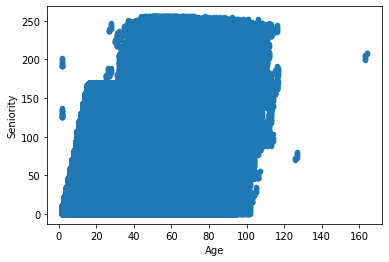

In [126]:
df.plot(kind='scatter', x='Age', y='Seniority')
plt.show()

In [127]:
X_train, X_test, y_train, y_test = train_test_split(df['Age'], df['Seniority'])

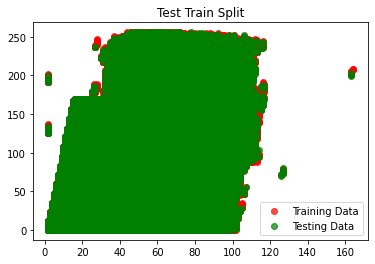

In [128]:
plt.scatter(X_train, y_train, label='Training Data', color='r', alpha=.7)
plt.scatter(X_test, y_test, label='Testing Data', color='g', alpha=.7)
plt.legend()
plt.title('Test Train Split')
plt.show()

In [129]:
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

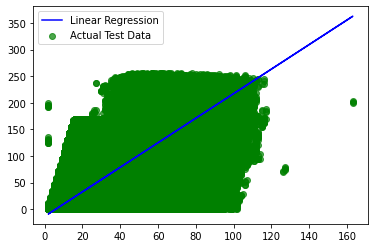

In [130]:
prediction = LR.predict(X_test.values.reshape(-1,1))

plt.plot(X_test, prediction, label='Linear Regression', color='b')
plt.scatter(X_test, y_test, label='Actual Test Data', color='g', alpha=.7)
plt.legend()
plt.show()

In [131]:
LR.predict(np.array([[50]]))[0]

101.97008572081027

In [132]:
LR.score(X_test.values.reshape(-1,1), y_test.values)

0.35751671110777117

In [133]:
LR.intercept_

-13.380759903495772

In [134]:
LR.coef_

array([2.30701691])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df['Age'], df['Particular Account'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)

Prediction 0.18992530501250196
Intercept -0.12023618614249285
Slope [0.00620323]


In [58]:
X_train, X_test, y_train, y_test = train_test_split(df['Age'], df['Particular Account'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 0.18993595689775208
Intercept -0.12016394257993027
Slope [0.006202]
Regression Equation: y = [0.006202] x + -0.12016394257993027
Linear Regression Score 0.10090753170178268


In [59]:
X_train, X_test, y_train, y_test = train_test_split(df['Activity Index'], df['Payroll Account'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 8.636447219483152
Intercept 0.0019644877458432908
Slope [0.17268965]
Regression Equation: y = [0.17268965] x + 0.0019644877458432908
Linear Regression Score 0.0994055693161221


In [60]:
X_train, X_test, y_train, y_test = train_test_split(df['Activity Index'], df['Long-Term Deposits'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 4.660806614432947
Intercept 0.00038146422120716866
Slope [0.0932085]
Regression Equation: y = [0.0932085] x + 0.00038146422120716866
Linear Regression Score 0.052497453679293815


In [61]:
X_train, X_test, y_train, y_test = train_test_split(df['Activity Index'], df['E-Account'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 7.87270694754353
Intercept 0.01091195672425943
Slope [0.1572359]
Regression Equation: y = [0.1572359] x + 0.01091195672425943
Linear Regression Score 0.08099044585694937


In [62]:
X_train, X_test, y_train, y_test = train_test_split(df['Activity Index'], df['Taxes'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 4.901014036374913
Intercept 0.007782067556946978
Slope [0.09786464]
Regression Equation: y = [0.09786464] x + 0.007782067556946978
Linear Regression Score 0.0479409421797965


In [63]:
X_train, X_test, y_train, y_test = train_test_split(df['Activity Index'], df['Credit Card'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 4.809639720100664
Intercept 0.00048658132654713637
Slope [0.09618306]
Regression Equation: y = [0.09618306] x + 0.00048658132654713637
Linear Regression Score 0.05382713944494466


In [64]:
X_train, X_test, y_train, y_test = train_test_split(df['Activity Index'], df['Payroll'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 5.943351476912353
Intercept 0.00032739807408547345
Slope [0.11886048]
Regression Equation: y = [0.11886048] x + 0.00032739807408547345
Linear Regression Score 0.0680840926195706


In [65]:
X_train, X_test, y_train, y_test = train_test_split(df['Activity Index'], df['Pension'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 6.457117891757284
Intercept 0.00036931700823294306
Slope [0.12913497]
Regression Equation: y = [0.12913497] x + 0.00036931700823294306
Linear Regression Score 0.07404564832173488


In [66]:
X_train, X_test, y_train, y_test = train_test_split(df['Activity Index'], df['Direct Debit'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 13.822168540222355
Intercept 0.0016231649739001652
Slope [0.27641091]
Regression Equation: y = [0.27641091] x + 0.0016231649739001652
Linear Regression Score 0.1697811254304158


In [67]:
X_train, X_test, y_train, y_test = train_test_split(df['Current Accounts'], df['Payroll Account'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction -9.700183530419206
Intercept 0.21080546698301145
Slope [-0.19821978]
Regression Equation: y = [-0.19821978] x + 0.21080546698301145
Linear Regression Score 0.11928180975289648


In [68]:
X_train, X_test, y_train, y_test = train_test_split(df['Current Accounts'], df['Payroll'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction -6.009416858615071
Intercept 0.1352058710812256
Slope [-0.12289245]
Regression Equation: y = [-0.12289245] x + 0.1352058710812256
Linear Regression Score 0.06624102987068059


In [69]:
X_train, X_test, y_train, y_test = train_test_split(df['Current Accounts'], df['Pension'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction -6.568248234192501
Intercept 0.14735505593266657
Slope [-0.13431207]
Regression Equation: y = [-0.13431207] x + 0.14735505593266657
Linear Regression Score 0.07297404589954504


In [70]:
X_train, X_test, y_train, y_test = train_test_split(df['Payroll Account'], df['Activity Index'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 29.24382372355644
Intercept 0.4101312089457024
Slope [0.57667385]
Regression Equation: y = [0.57667385] x + 0.4101312089457024
Linear Regression Score 0.09904835541166057


In [71]:
X_train, X_test, y_train, y_test = train_test_split(df['Payroll Account'], df['Current Accounts'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction -29.408876260331226
Intercept 0.7041994810901341
Slope [-0.60226151]
Regression Equation: y = [-0.60226151] x + 0.7041994810901341
Linear Regression Score 0.11913083180436312


In [72]:
X_train, X_test, y_train, y_test = train_test_split(df['Payroll Account'], df['E-Account'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 15.519875517590044
Intercept 0.05766299852978891
Slope [0.30924425]
Regression Equation: y = [0.30924425] x + 0.05766299852978891
Linear Regression Score 0.09425673816001023


In [73]:
X_train, X_test, y_train, y_test = train_test_split(df['Payroll Account'], df['Taxes'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 13.08561735028301
Intercept 0.031356921847346494
Slope [0.26108521]
Regression Equation: y = [0.26108521] x + 0.031356921847346494
Linear Regression Score 0.10351267353849158


In [74]:
X_train, X_test, y_train, y_test = train_test_split(df['Payroll Account'], df['Credit Card'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 14.611360816212095
Intercept 0.020790364674140787
Slope [0.29181141]
Regression Equation: y = [0.29181141] x + 0.020790364674140787
Linear Regression Score 0.150020316460599


In [75]:
X_train, X_test, y_train, y_test = train_test_split(df['Payroll Account'], df['Payroll'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 31.607023889702855
Intercept 0.003536507952146363
Slope [0.63206975]
Regression Equation: y = [0.63206975] x + 0.003536507952146363
Linear Regression Score 0.5734461305324217


In [76]:
X_train, X_test, y_train, y_test = train_test_split(df['Payroll Account'], df['Pension'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 34.248886171882944
Intercept 0.003971222930101888
Slope [0.6848983]
Regression Equation: y = [0.6848983] x + 0.003971222930101888
Linear Regression Score 0.6235903984950154


In [77]:
X_train, X_test, y_train, y_test = train_test_split(df['Payroll Account'], df['Direct Debit'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 32.90179231801218
Intercept 0.07485933489296069
Slope [0.65653866]
Regression Equation: y = [0.65653866] x + 0.07485933489296069
Linear Regression Score 0.2865105265534593


In [78]:
X_train, X_test, y_train, y_test = train_test_split(df['Particular Account'], df['Age'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 851.244528716994
Intercept 38.08602675573674
Slope [16.26317004]
Regression Equation: y = [16.26317004] x + 38.08602675573674
Linear Regression Score 0.10090057569298083


In [79]:
X_train, X_test, y_train, y_test = train_test_split(df['Particular Plus Account'], df['Direct Debit'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 16.653408384488667
Intercept 0.11356078776336936
Slope [0.33079695]
Regression Equation: y = [0.33079695] x + 0.11356078776336936
Linear Regression Score 0.04085644578241876


In [80]:
X_train, X_test, y_train, y_test = train_test_split(df['Long-Term Deposits'], df['Activity Index'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 28.550339451807048
Intercept 0.432785174222946
Slope [0.56235109]
Regression Equation: y = [0.56235109] x + 0.432785174222946
Linear Regression Score 0.05252279359021572


In [81]:
X_train, X_test, y_train, y_test = train_test_split(df['Long-Term Deposits'], df['E-Account'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 15.158271415242718
Intercept 0.06990543993496444
Slope [0.30176732]
Regression Equation: y = [0.30176732] x + 0.06990543993496444
Linear Regression Score 0.049594918103427865


In [82]:
X_train, X_test, y_train, y_test = train_test_split(df['E-Account'], df['Activity Index'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 26.119876583692434
Intercept 0.4144075061447807
Slope [0.51410938]
Regression Equation: y = [0.51410938] x + 0.4144075061447807
Linear Regression Score 0.08083368584056538


In [83]:
X_train, X_test, y_train, y_test = train_test_split(df['E-Account'], df['Payroll Account'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 15.22061586754666
Intercept 0.05569317699696229
Slope [0.30329845]
Regression Equation: y = [0.30329845] x + 0.05569317699696229
Linear Regression Score 0.09343475474625895


In [84]:
X_train, X_test, y_train, y_test = train_test_split(df['E-Account'], df['Long-Term Deposits'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 8.19760030547057
Intercept 0.029466214065687717
Slope [0.16336268]
Regression Equation: y = [0.16336268] x + 0.029466214065687717
Linear Regression Score 0.049583677080148325


In [85]:
X_train, X_test, y_train, y_test = train_test_split(df['E-Account'], df['Taxes'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 8.12576412226098
Intercept 0.039147284840146464
Slope [0.16173234]
Regression Equation: y = [0.16173234] x + 0.039147284840146464
Linear Regression Score 0.040607078262598795


In [86]:
X_train, X_test, y_train, y_test = train_test_split(df['E-Account'], df['Credit Card'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 9.58319963563103
Intercept 0.02858026625795804
Slope [0.19109239]
Regression Equation: y = [0.19109239] x + 0.02858026625795804
Linear Regression Score 0.06547908499718835


In [87]:
X_train, X_test, y_train, y_test = train_test_split(df['E-Account'], df['Payroll'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 10.8800726402861
Intercept 0.03668368019616507
Slope [0.21686778]
Regression Equation: y = [0.21686778] x + 0.03668368019616507
Linear Regression Score 0.06960280399460328


In [88]:
X_train, X_test, y_train, y_test = train_test_split(df['E-Account'], df['Pension'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 12.134438823724162
Intercept 0.039354700585426436
Slope [0.24190168]
Regression Equation: y = [0.24190168] x + 0.039354700585426436
Linear Regression Score 0.07957597518225357


In [89]:
X_train, X_test, y_train, y_test = train_test_split(df['E-Account'], df['Direct Debit'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 18.039694775896717
Intercept 0.09819596396789795
Slope [0.35882998]
Regression Equation: y = [0.35882998] x + 0.09819596396789795
Linear Regression Score 0.08801513259310512


In [90]:
X_train, X_test, y_train, y_test = train_test_split(df['Taxes'], df['Activity Index'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 24.83569312868166
Intercept 0.43105639931162937
Slope [0.48809273]
Regression Equation: y = [0.48809273] x + 0.43105639931162937
Linear Regression Score 0.04778587621013963


In [91]:
X_train, X_test, y_train, y_test = train_test_split(df['Taxes'], df['Payroll Account'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 19.6024233881717
Intercept 0.06034294307642457
Slope [0.39084161]
Regression Equation: y = [0.39084161] x + 0.06034294307642457
Linear Regression Score 0.10232581379899242


In [92]:
X_train, X_test, y_train, y_test = train_test_split(df['Taxes'], df['E-Account'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 12.43420577224566
Intercept 0.06975130950066616
Slope [0.24728909]
Regression Equation: y = [0.24728909] x + 0.06975130950066616
Linear Regression Score 0.03983182386807249


In [93]:
X_train, X_test, y_train, y_test = train_test_split(df['Taxes'], df['Credit Card'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 12.477194586575171
Intercept 0.03130081183384929
Slope [0.24891788]
Regression Equation: y = [0.24891788] x + 0.03130081183384929
Linear Regression Score 0.07156242427727477


In [94]:
X_train, X_test, y_train, y_test = train_test_split(df['Taxes'], df['Payroll'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 14.066772528739524
Intercept 0.03989828683809723
Slope [0.28053748]
Regression Equation: y = [0.28053748] x + 0.03989828683809723
Linear Regression Score 0.07598553227482019


In [95]:
X_train, X_test, y_train, y_test = train_test_split(df['Taxes'], df['Pension'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 15.522059386882255
Intercept 0.043063523225648694
Slope [0.30957992]
Regression Equation: y = [0.30957992] x + 0.043063523225648694
Linear Regression Score 0.08476845485480888


In [96]:
X_train, X_test, y_train, y_test = train_test_split(df['Taxes'], df['Direct Debit'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 25.847381443356703
Intercept 0.10084724388447647
Slope [0.51493068]
Regression Equation: y = [0.51493068] x + 0.10084724388447647
Linear Regression Score 0.11810070417458074


In [97]:
X_train, X_test, y_train, y_test = train_test_split(df['Credit Card'], df['Activity Index'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 28.531115947564828
Intercept 0.432059898949255
Slope [0.56198112]
Regression Equation: y = [0.56198112] x + 0.432059898949255
Linear Regression Score 0.05398966288565188


In [98]:
X_train, X_test, y_train, y_test = train_test_split(df['Credit Card'], df['Payroll Account'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 25.650131480758816
Intercept 0.058192490711966124
Slope [0.51183878]
Regression Equation: y = [0.51183878] x + 0.058192490711966124
Linear Regression Score 0.14901415856838152


In [99]:
X_train, X_test, y_train, y_test = train_test_split(df['Credit Card'], df['E-Account'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 17.170383784844955
Intercept 0.06758133712403958
Slope [0.34205605]
Regression Equation: y = [0.34205605] x + 0.06758133712403958
Linear Regression Score 0.06554985276307668


In [100]:
X_train, X_test, y_train, y_test = train_test_split(df['Credit Card'], df['Taxes'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 14.611682622945093
Intercept 0.03962253426146392
Slope [0.2914412]
Regression Equation: y = [0.2914412] x + 0.03962253426146392
Linear Regression Score 0.07291017311400882


In [101]:
X_train, X_test, y_train, y_test = train_test_split(df['Credit Card'], df['Payroll'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 19.705527779586866
Intercept 0.037246061777520975
Slope [0.39336563]
Regression Equation: y = [0.39336563] x + 0.037246061777520975
Linear Regression Score 0.12850843240332432


In [102]:
X_train, X_test, y_train, y_test = train_test_split(df['Credit Card'], df['Pension'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 21.271276674499074
Intercept 0.04045348423010925
Slope [0.42461646]
Regression Equation: y = [0.42461646] x + 0.04045348423010925
Linear Regression Score 0.13747683838210756


In [103]:
X_train, X_test, y_train, y_test = train_test_split(df['Credit Card'], df['Direct Debit'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 30.480188871149817
Intercept 0.10090922307543537
Slope [0.60758559]
Regression Equation: y = [0.60758559] x + 0.10090922307543537
Linear Regression Score 0.14022615533195393


In [104]:
X_train, X_test, y_train, y_test = train_test_split(df['Payroll'], df['Activity Index'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 28.98703144831219
Intercept 0.4255952147197849
Slope [0.57122872]
Regression Equation: y = [0.57122872] x + 0.4255952147197849
Linear Regression Score 0.06774575780340952


In [105]:
X_train, X_test, y_train, y_test = train_test_split(df['Payroll'], df['Current Accounts'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction -26.180064461427133
Intercept 0.6849243305216866
Slope [-0.53729978]
Regression Equation: y = [-0.53729978] x + 0.6849243305216866
Linear Regression Score 0.06610474790165477


In [106]:
X_train, X_test, y_train, y_test = train_test_split(df['Payroll'], df['Payroll Account'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 45.492596639333144
Intercept 0.031184571383809652
Slope [0.90922824]
Regression Equation: y = [0.90922824] x + 0.031184571383809652
Linear Regression Score 0.5740228281749634


In [107]:
X_train, X_test, y_train, y_test = train_test_split(df['Payroll'], df['E-Account'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 16.012512428667396
Intercept 0.06533492712746128
Slope [0.31894355]
Regression Equation: y = [0.31894355] x + 0.06533492712746128
Linear Regression Score 0.06914380633362582


In [108]:
X_train, X_test, y_train, y_test = train_test_split(df['Payroll'], df['Taxes'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 13.542265015664945
Intercept 0.03777421494359774
Slope [0.27008982]
Regression Equation: y = [0.27008982] x + 0.03777421494359774
Linear Regression Score 0.07642528433400586


In [109]:
X_train, X_test, y_train, y_test = train_test_split(df['Payroll'], df['Credit Card'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 16.19109105725899
Intercept 0.02673065874471666
Slope [0.32328721]
Regression Equation: y = [0.32328721] x + 0.02673065874471666
Linear Regression Score 0.1270055021304597


In [110]:
X_train, X_test, y_train, y_test = train_test_split(df['Payroll'], df['Pension'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 49.75721412313062
Intercept 0.00495481375935744
Slope [0.99504519]
Regression Equation: y = [0.99504519] x + 0.00495481375935744
Linear Regression Score 0.9154748031392702


In [111]:
X_train, X_test, y_train, y_test = train_test_split(df['Payroll'], df['Direct Debit'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 34.71088001840047
Intercept 0.09011991441322895
Slope [0.6924152]
Regression Equation: y = [0.6924152] x + 0.09011991441322895
Linear Regression Score 0.22238770025664434


In [112]:
X_train, X_test, y_train, y_test = train_test_split(df['Pension'], df['Activity Index'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 29.115902134646223
Intercept 0.422769869444704
Slope [0.57386265]
Regression Equation: y = [0.57386265] x + 0.422769869444704
Linear Regression Score 0.0739229817902548


In [113]:
X_train, X_test, y_train, y_test = train_test_split(df['Pension'], df['Current Accounts'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction -26.462552157661445
Intercept 0.6877190981681465
Slope [-0.54300543]
Regression Equation: y = [-0.54300543] x + 0.6877190981681465
Linear Regression Score 0.07323192092997766


In [114]:
X_train, X_test, y_train, y_test = train_test_split(df['Pension'], df['Payroll Account'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 45.59012317884538
Intercept 0.026742597900602613
Slope [0.91126761]
Regression Equation: y = [0.91126761] x + 0.026742597900602613
Linear Regression Score 0.6249176826823089


In [115]:
X_train, X_test, y_train, y_test = train_test_split(df['Pension'], df['E-Account'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 16.517290154370407
Intercept 0.06326917226380169
Slope [0.32908042]
Regression Equation: y = [0.32908042] x + 0.06326917226380169
Linear Regression Score 0.07928044342165097


In [116]:
X_train, X_test, y_train, y_test = train_test_split(df['Pension'], df['Taxes'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 13.830875169599889
Intercept 0.03614321564581805
Slope [0.27589464]
Regression Equation: y = [0.27589464] x + 0.03614321564581805
Linear Regression Score 0.08516939847135829


In [117]:
X_train, X_test, y_train, y_test = train_test_split(df['Pension'], df['Credit Card'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 16.185470608772246
Intercept 0.025240126216632703
Slope [0.32320461]
Regression Equation: y = [0.32320461] x + 0.025240126216632703
Linear Regression Score 0.13703961409705034


In [118]:
X_train, X_test, y_train, y_test = train_test_split(df['Pension'], df['Payroll'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 46.052029495177685
Intercept 9.776693343788168e-13
Slope [0.92104059]
Regression Equation: y = [0.92104059] x + 9.776693343788168e-13
Linear Regression Score 0.9156404864391162


In [119]:
X_train, X_test, y_train, y_test = train_test_split(df['Pension'], df['Direct Debit'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 34.7891400501112
Intercept 0.08669669105187976
Slope [0.69404887]
Regression Equation: y = [0.69404887] x + 0.08669669105187976
Linear Regression Score 0.24027086691610722


In [120]:
X_train, X_test, y_train, y_test = train_test_split(df['Direct Debit'], df['Activity Index'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 31.11983339832013
Intercept 0.37821925151401703
Slope [0.61483228]
Regression Equation: y = [0.61483228] x + 0.37821925151401703
Linear Regression Score 0.170023094587873


In [121]:
X_train, X_test, y_train, y_test = train_test_split(df['Direct Debit'], df['Payroll Account'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 21.884297241126195
Intercept 0.024874168260548432
Slope [0.43718846]
Regression Equation: y = [0.43718846] x + 0.024874168260548432
Linear Regression Score 0.2862965709237508


In [122]:
X_train, X_test, y_train, y_test = train_test_split(df['Direct Debit'], df['Particular Plus Account'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 6.1777176580382385
Intercept 0.027531213332301387
Slope [0.12300373]
Regression Equation: y = [0.12300373] x + 0.027531213332301387
Linear Regression Score 0.040476083472102964


In [123]:
X_train, X_test, y_train, y_test = train_test_split(df['Direct Debit'], df['E-Account'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 12.264278543886176
Intercept 0.05146018259754905
Slope [0.24425637]
Regression Equation: y = [0.24425637] x + 0.05146018259754905
Linear Regression Score 0.08772392155383202


In [124]:
X_train, X_test, y_train, y_test = train_test_split(df['Direct Debit'], df['Taxes'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 11.509941776567358
Intercept 0.023144343078753904
Slope [0.22973595]
Regression Equation: y = [0.22973595] x + 0.023144343078753904
Linear Regression Score 0.11812257423700978


In [125]:
X_train, X_test, y_train, y_test = train_test_split(df['Direct Debit'], df['Credit Card'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 11.55792886887417
Intercept 0.014837805190752222
Slope [0.23086182]
Regression Equation: y = [0.23086182] x + 0.014837805190752222
Linear Regression Score 0.14080494442632074


In [126]:
X_train, X_test, y_train, y_test = train_test_split(df['Direct Debit'], df['Payroll'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 16.040770498780383
Intercept 0.013633469534247412
Slope [0.32054274]
Regression Equation: y = [0.32054274] x + 0.013633469534247412
Linear Regression Score 0.22223733637665977


In [127]:
X_train, X_test, y_train, y_test = train_test_split(df['Direct Debit'], df['Pension'])
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)
prediction = LR.predict(X_test.values.reshape(-1,1))
print("Prediction", LR.predict(np.array([[50]]))[0])
print("Intercept", LR.intercept_)
print("Slope", LR.coef_)
print("Regression Equation: y =", LR.coef_, "x +", LR.intercept_)
print("Linear Regression Score", LR.score(X_test.values.reshape(-1,1), y_test.values))

Prediction 17.38648728805738
Intercept 0.014917204570774285
Slope [0.3474314]
Regression Equation: y = [0.3474314] x + 0.014917204570774285
Linear Regression Score 0.24048437899538988


In [ ]:
# Multiple Regression
#
# Making predictive equations to try and predict a variable by using multiple variables.

In [49]:
reg = linear_model.LinearRegression()
reg.fit(df[['Payroll Account', 'Long-Term Deposits', 'E-Account', 'Taxes', 'Credit Card', 
            'Payroll', 'Pension', 'Direct Debit']], df['Activity Index'])

LinearRegression()

In [50]:
reg.coef_

array([ 0.17393528,  0.39572238,  0.21857327,  0.11444358,  0.07900486,
        0.05001841, -0.09175267,  0.43412084])

In [51]:
reg.intercept_

0.34538791145545256

In [52]:
reg.predict([[1, 0, 1, 0, 1, 0, 0, 1]])

C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.25102216])

In [53]:
reg.predict([[1, 0, 0, 0, 0, 0, 0, 0]])

C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.51932319])

In [54]:
reg = linear_model.LinearRegression()
reg.fit(df[['Payroll Account', 'Long-Term Deposits', 'E-Account', 'Taxes', 'Credit Card', 
            'Payroll', 'Pension', 'Direct Debit']], df['Activity Index'])
print('Prediction', reg.predict([[1, 0, 1, 0, 1, 0, 0, 1]]))
print("Coefficients", reg.coef_)
print('Intercept', reg.intercept_)

Prediction [1.25102216]
Coefficients [ 0.17393528  0.39572238  0.21857327  0.11444358  0.07900486  0.05001841
 -0.09175267  0.43412084]
Intercept 0.34538791145545256


C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [55]:
reg = linear_model.LinearRegression()
reg.fit(df[['Payroll Account', 'Long-Term Deposits', 'E-Account', 'Taxes', 'Credit Card', 
            'Payroll', 'Pension', 'Direct Debit']], df['Activity Index'])
print('Prediction', reg.predict([[1, 0, 1, 0, 1, 0, 0, 1]]))
print("Coefficients", reg.coef_)
print('Intercept', reg.intercept_)
print("Regression Equation: y =", reg.coef_, "x +", reg.intercept_)

Prediction [1.25102216]
Coefficients [ 0.17393528  0.39572238  0.21857327  0.11444358  0.07900486  0.05001841
 -0.09175267  0.43412084]
Intercept 0.34538791145545256
Regression Equation: y = [ 0.17393528  0.39572238  0.21857327  0.11444358  0.07900486  0.05001841
 -0.09175267  0.43412084] x + 0.34538791145545256


C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [58]:
reg = linear_model.LinearRegression()
reg.fit(df[['Payroll Account', 'Payroll', 'Pension']], df['Current Accounts'])
print('Prediction', reg.predict([[1, 0, 1]]))
print("Coefficients", reg.coef_)
print('Intercept', reg.intercept_)
print("Regression Equation: y =", reg.coef_, "x +", reg.intercept_)

Prediction [0.05736317]
Coefficients [-0.61256443  0.05349307 -0.03419848]
Intercept 0.7041260872192255
Regression Equation: y = [-0.61256443  0.05349307 -0.03419848] x + 0.7041260872192255


C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [59]:
reg = linear_model.LinearRegression()
reg.fit(df[['Activity Index', 'Current Accounts', 'E-Account', 'Taxes', 'Credit Card', 
            'Payroll', 'Pension', 'Direct Debit']], df['Payroll Account'])
print('Prediction', reg.predict([[1, 1, 1, 0, 1, 0, 0, 1]]))
print("Coefficients", reg.coef_)
print('Intercept', reg.intercept_)
print("Regression Equation: y =", reg.coef_, "x +", reg.intercept_)

Prediction [0.22690748]
Coefficients [ 0.04983139 -0.1011096   0.03181126  0.04391294  0.06692502  0.02839656
  0.67451382  0.11991249]
Intercept 0.05953692798789799
Regression Equation: y = [ 0.04983139 -0.1011096   0.03181126  0.04391294  0.06692502  0.02839656
  0.67451382  0.11991249] x + 0.05953692798789799


C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [61]:
reg = linear_model.LinearRegression()
reg.fit(df[['Activity Index', 'E-Account']], df['Long-Term Deposits'])
print('Prediction', reg.predict([[1, 1]]))
print("Coefficients", reg.coef_)
print('Intercept', reg.intercept_)
print("Regression Equation: y =", reg.coef_, "x +", reg.intercept_)

Prediction [0.19818352]
Coefficients [0.07344134 0.12573287]
Intercept -0.0009906954589123315
Regression Equation: y = [0.07344134 0.12573287] x + -0.0009906954589123315


C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [62]:
reg = linear_model.LinearRegression()
reg.fit(df[['Activity Index', 'Payroll Account', 'Long-Term Deposits', 'Taxes', 'Credit Card', 
            'Payroll', 'Pension', 'Direct Debit']], df['E-Account'])
print('Prediction', reg.predict([[1, 1, 1, 0, 1, 0, 0, 1]]))
print("Coefficients", reg.coef_)
print('Intercept', reg.intercept_)
print("Regression Equation: y =", reg.coef_, "x +", reg.intercept_)

Prediction [0.60601549]
Coefficients [ 0.07142447  0.10559897  0.20986961  0.06764832  0.13505848 -0.08433393
  0.13916534  0.07420132]
Intercept 0.009862632917611497
Regression Equation: y = [ 0.07142447  0.10559897  0.20986961  0.06764832  0.13505848 -0.08433393
  0.13916534  0.07420132] x + 0.009862632917611497


C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [64]:
reg = linear_model.LinearRegression()
reg.fit(df[['Activity Index', 'Payroll Account', 'E-Account', 'Credit Card', 
            'Payroll', 'Pension', 'Direct Debit']], df['Taxes'])
print('Prediction', reg.predict([[1, 1, 1, 0, 1, 0, 0]]))
print("Coefficients", reg.coef_)
print('Intercept', reg.intercept_)
print("Regression Equation: y =", reg.coef_, "x +", reg.intercept_)

Prediction [0.11420174]
Coefficients [ 0.02457041  0.08988897  0.04453374  0.12578175 -0.05164602  0.08777736
  0.12141838]
Intercept 0.006854641887861376
Regression Equation: y = [ 0.02457041  0.08988897  0.04453374  0.12578175 -0.05164602  0.08777736
  0.12141838] x + 0.006854641887861376


C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [65]:
reg = linear_model.LinearRegression()
reg.fit(df[['Activity Index', 'Payroll Account', 'E-Account', 'Taxes', 
            'Payroll', 'Pension', 'Direct Debit']], df['Credit Card'])
print('Prediction', reg.predict([[1, 1, 1, 0, 1, 0, 1]]))
print("Coefficients", reg.coef_)
print('Intercept', reg.intercept_)
print("Regression Equation: y =", reg.coef_, "x +", reg.intercept_)

Prediction [0.31823735]
Coefficients [0.01636733 0.09505429 0.07625999 0.10019424 0.03029152 0.07564898
 0.10177949]
Intercept -0.0015152680316857584
Regression Equation: y = [0.01636733 0.09505429 0.07625999 0.10019424 0.03029152 0.07564898
 0.10177949] x + -0.0015152680316857584


C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [66]:
reg = linear_model.LinearRegression()
reg.fit(df[['Activity Index', 'Current Accounts', 'Payroll Account', 'E-Account', 'Taxes', 'Credit Card', 
            'Pension', 'Direct Debit']], df['Payroll'])
print('Prediction', reg.predict([[1, 1, 1, 0, 1, 0, 0, 1]]))
print("Coefficients", reg.coef_)
print('Intercept', reg.intercept_)
print("Regression Equation: y =", reg.coef_, "x +", reg.intercept_)

Prediction [0.00225895]
Coefficients [ 1.19581867e-04  1.08886768e-03  5.30887903e-03 -6.93892752e-03
 -5.30160829e-03  3.94513291e-03  9.17891599e-01  1.59178175e-03]
Intercept -0.0005485553778106292
Regression Equation: y = [ 1.19581867e-04  1.08886768e-03  5.30887903e-03 -6.93892752e-03
 -5.30160829e-03  3.94513291e-03  9.17891599e-01  1.59178175e-03] x + -0.0005485553778106292


C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [67]:
reg = linear_model.LinearRegression()
reg.fit(df[['Activity Index', 'Current Accounts', 'Payroll Account', 'E-Account', 'Taxes', 'Credit Card', 
            'Payroll', 'Direct Debit']], df['Pension'])
print('Prediction', reg.predict([[1, 1, 1, 0, 1, 0, 0, 1]]))
print("Coefficients", reg.coef_)
print('Intercept', reg.intercept_)
print("Regression Equation: y =", reg.coef_, "x +", reg.intercept_)

Prediction [0.1358107]
Coefficients [-7.65423289e-04 -1.77457075e-03  1.19607975e-01  1.02070594e-02
  8.54529162e-03  9.37071321e-03  8.70609879e-01  9.51197124e-03]
Intercept 0.0006854586501053306
Regression Equation: y = [-7.65423289e-04 -1.77457075e-03  1.19607975e-01  1.02070594e-02
  8.54529162e-03  9.37071321e-03  8.70609879e-01  9.51197124e-03] x + 0.0006854586501053306


C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [68]:
reg = linear_model.LinearRegression()
reg.fit(df[['Activity Index', 'Payroll Account', 'Particular Plus Account', 'E-Account', 'Taxes', 'Credit Card', 
            'Payroll', 'Pension']], df['Direct Debit'])
print('Prediction', reg.predict([[1, 1, 1, 0, 1, 0, 0, 1]]))
print("Coefficients", reg.coef_)
print('Intercept', reg.intercept_)
print("Regression Equation: y =", reg.coef_, "x +", reg.intercept_)

Prediction [0.8769215]
Coefficients [0.14549388 0.31222555 0.08657338 0.07561974 0.18745619 0.19809647
 0.02609673 0.14782732]
Intercept -0.0026548301643343764
Regression Equation: y = [0.14549388 0.31222555 0.08657338 0.07561974 0.18745619 0.19809647
 0.02609673 0.14782732] x + -0.0026548301643343764


C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Ensemble Model (Each model takes about 30 minutes to run)
#
# Testing the accuracy of a normal model and comparing it to the accuracy of the enemble model and seeing which is a 
# better predictor.

In [64]:
X = df.drop(['Activity Index', 'Partitioned Date', 'Customer Code', 'Employee Index', 'Country Residence', 
            'Date Joined', 'Last Date as Primary Customer', 'Customer Type at Beginning of Month',
            'Customer Relation Type at Beginning of Month', 'Spouse Index', 'Channel Used to Join', 'Address Type', 
            'Province Code', 'Province Name', 'Segmentation'], axis = 'columns')
y = df['Activity Index']

In [65]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]

array([[ 1.09675224, -0.30167492, -0.25139073, -1.10558411, -0.04266148,
         0.06963877, -0.22267749, -0.05053388, -0.19605188, -0.01011443,
        -0.00481199,  0.72497659, -0.01985142, -0.29661775, -0.09779976,
        -0.09910672, -0.38485913, -0.21275834, -0.04221266, -0.04078909,
        -0.21188632, -0.30034592, -0.13723759, -0.07695089, -0.09620733,
        -0.05132568, -0.23547713, -0.21552391, -0.16211291, -0.06214966,
        -0.24045871, -0.25120584, -0.38298669],
       [-0.91178295, -1.00066204, -0.25139073, -0.66831106, -0.04266148,
         0.06963877,  4.49079975, -0.05053388, -0.44678377, -0.01011443,
        -0.00481199,  0.72497659, -0.01985142, -0.29661775, -0.09779976,
        -0.09910672, -0.38485913, -0.21275834, -0.04221266, -0.04078909,
        -0.21188632, -0.30034592, -0.13723759, -0.07695089, -0.09620733,
        -0.05132568, -0.23547713, -0.21552391, -0.16211291, -0.06214966,
        -0.24045871, -0.25120584, -0.38298669],
       [-0.91178295, -1.0006

In [66]:
A_train, A_test, b_train, b_test = train_test_split(X_scaled, y, stratify = y, random_state = 10)

In [67]:
A_train.shape

(10235481, 33)

In [68]:
A_test.shape

(3411828, 33)

In [69]:
b_train.value_counts()

0.0    5559093
1.0    4676388
Name: Activity Index, dtype: int64

In [70]:
4676388/5559093

0.8412142052669384

In [71]:
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv = 5)
scores

array([0.95989613, 0.94839166, 0.85662523, 0.8607656 , 0.85344396])

In [72]:
scores.mean()

0.8958245143873743

In [73]:
bag_model = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 10,
    max_samples = 0.8,
    oob_score = True,
    random_state = 0)

In [74]:
bag_model.fit(A_train, b_train)
bag_model.oob_score_

C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:747: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:753: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


0.9294587132739536

In [75]:
bag_model.score(A_test, b_test)

0.9360720997658734

In [57]:
X = df.drop(['Payroll Account', 'Partitioned Date', 'Customer Code', 'Employee Index', 'Country Residence', 
            'Date Joined', 'Last Date as Primary Customer', 'Customer Type at Beginning of Month',
            'Customer Relation Type at Beginning of Month', 'Spouse Index', 'Channel Used to Join', 'Address Type', 
            'Province Code', 'Province Name', 'Segmentation'], axis = 'columns')
y = df['Payroll Account']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:3])

A_train, A_test, b_train, b_test = train_test_split(X_scaled, y, stratify = y, random_state = 10)

print(A_train.shape)

print(A_test.shape)

print(b_train.value_counts())

print(827715/9407766)

scores = cross_val_score(DecisionTreeClassifier(), X, y, cv = 5)
print(scores)

print(scores.mean())

bag_model = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 10,
    max_samples = 0.8,
    oob_score = True,
    random_state = 0)

bag_model.fit(A_train, b_train)
print(bag_model.oob_score_)

print(bag_model.score(A_test, b_test))

[[ 1.09675224 -0.30167492 -0.25139073 -1.10558411 -0.04266148  0.06963877
  -0.22267749 -0.05053388  1.09030164 -0.19605188 -0.01011443 -0.00481199
   0.72497659 -0.01985142 -0.09779976 -0.09910672 -0.38485913 -0.21275834
  -0.04221266 -0.04078909 -0.21188632 -0.30034592 -0.13723759 -0.07695089
  -0.09620733 -0.05132568 -0.23547713 -0.21552391 -0.16211291 -0.06214966
  -0.24045871 -0.25120584 -0.38298669]
 [-0.91178295 -1.00066204 -0.25139073 -0.66831106 -0.04266148  0.06963877
   4.49079975 -0.05053388 -0.91717738 -0.44678377 -0.01011443 -0.00481199
   0.72497659 -0.01985142 -0.09779976 -0.09910672 -0.38485913 -0.21275834
  -0.04221266 -0.04078909 -0.21188632 -0.30034592 -0.13723759 -0.07695089
  -0.09620733 -0.05132568 -0.23547713 -0.21552391 -0.16211291 -0.06214966
  -0.24045871 -0.25120584 -0.38298669]
 [-0.91178295 -1.00066204 -0.25139073 -0.66831106 -0.04266148  0.06963877
  -0.22267749 -0.05053388 -0.91717738 -0.0263993  -0.01011443 -0.00481199
   0.72497659 -0.01985142 -0.09779

C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:747: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:753: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


0.9929895820235513
0.9940671100653374


In [57]:
X = df.drop(['E-Account', 'Partitioned Date', 'Customer Code', 'Employee Index', 'Country Residence', 
            'Date Joined', 'Last Date as Primary Customer', 'Customer Type at Beginning of Month',
            'Customer Relation Type at Beginning of Month', 'Spouse Index', 'Channel Used to Join', 'Address Type', 
            'Province Code', 'Province Name', 'Segmentation'], axis = 'columns')
y = df['E-Account']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:3])

A_train, A_test, b_train, b_test = train_test_split(X_scaled, y, stratify = y, random_state = 10)

print(A_train.shape)

print(A_test.shape)

print(b_train.value_counts())

print(846920/9388561)

scores = cross_val_score(DecisionTreeClassifier(), X, y, cv = 5)
print(scores)

print(scores.mean())

bag_model = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 10,
    max_samples = 0.8,
    oob_score = True,
    random_state = 0)

bag_model.fit(A_train, b_train)
print(bag_model.oob_score_)

print(bag_model.score(A_test, b_test))

[[ 1.09675224 -0.30167492 -0.25139073 -1.10558411 -0.04266148  0.06963877
  -0.22267749 -0.05053388  1.09030164 -0.19605188 -0.01011443 -0.00481199
   0.72497659 -0.01985142 -0.29661775 -0.09779976 -0.09910672 -0.38485913
  -0.21275834 -0.04221266 -0.04078909 -0.21188632 -0.13723759 -0.07695089
  -0.09620733 -0.05132568 -0.23547713 -0.21552391 -0.16211291 -0.06214966
  -0.24045871 -0.25120584 -0.38298669]
 [-0.91178295 -1.00066204 -0.25139073 -0.66831106 -0.04266148  0.06963877
   4.49079975 -0.05053388 -0.91717738 -0.44678377 -0.01011443 -0.00481199
   0.72497659 -0.01985142 -0.29661775 -0.09779976 -0.09910672 -0.38485913
  -0.21275834 -0.04221266 -0.04078909 -0.21188632 -0.13723759 -0.07695089
  -0.09620733 -0.05132568 -0.23547713 -0.21552391 -0.16211291 -0.06214966
  -0.24045871 -0.25120584 -0.38298669]
 [-0.91178295 -1.00066204 -0.25139073 -0.66831106 -0.04266148  0.06963877
  -0.22267749 -0.05053388 -0.91717738 -0.0263993  -0.01011443 -0.00481199
   0.72497659 -0.01985142 -0.29661

C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:747: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:753: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


0.9817326611226185
0.9846891461117032


In [58]:
X = df.drop(['Taxes', 'Partitioned Date', 'Customer Code', 'Employee Index', 'Country Residence', 
            'Date Joined', 'Last Date as Primary Customer', 'Customer Type at Beginning of Month',
            'Customer Relation Type at Beginning of Month', 'Spouse Index', 'Channel Used to Join', 'Address Type', 
            'Province Code', 'Province Name', 'Segmentation'], axis = 'columns')
y = df['Taxes']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:3])

A_train, A_test, b_train, b_test = train_test_split(X_scaled, y, stratify = y, random_state = 10)

print(A_train.shape)

print(A_test.shape)

print(b_train.value_counts())

print(537735/9697746)

scores = cross_val_score(DecisionTreeClassifier(), X, y, cv = 5)
print(scores)

print(scores.mean())

bag_model = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 10,
    max_samples = 0.8,
    oob_score = True,
    random_state = 0)

bag_model.fit(A_train, b_train)
print(bag_model.oob_score_)

print(bag_model.score(A_test, b_test))

[[ 1.09675224 -0.30167492 -0.25139073 -1.10558411 -0.04266148  0.06963877
  -0.22267749 -0.05053388  1.09030164 -0.19605188 -0.01011443 -0.00481199
   0.72497659 -0.01985142 -0.29661775 -0.09779976 -0.09910672 -0.38485913
  -0.21275834 -0.04221266 -0.04078909 -0.21188632 -0.30034592 -0.13723759
  -0.07695089 -0.09620733 -0.05132568 -0.21552391 -0.16211291 -0.06214966
  -0.24045871 -0.25120584 -0.38298669]
 [-0.91178295 -1.00066204 -0.25139073 -0.66831106 -0.04266148  0.06963877
   4.49079975 -0.05053388 -0.91717738 -0.44678377 -0.01011443 -0.00481199
   0.72497659 -0.01985142 -0.29661775 -0.09779976 -0.09910672 -0.38485913
  -0.21275834 -0.04221266 -0.04078909 -0.21188632 -0.30034592 -0.13723759
  -0.07695089 -0.09620733 -0.05132568 -0.21552391 -0.16211291 -0.06214966
  -0.24045871 -0.25120584 -0.38298669]
 [-0.91178295 -1.00066204 -0.25139073 -0.66831106 -0.04266148  0.06963877
  -0.22267749 -0.05053388 -0.91717738 -0.0263993  -0.01011443 -0.00481199
   0.72497659 -0.01985142 -0.29661

C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:747: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:753: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


0.9897621811813241
0.9916478790841742


In [59]:
X = df.drop(['Credit Card', 'Partitioned Date', 'Customer Code', 'Employee Index', 'Country Residence', 
            'Date Joined', 'Last Date as Primary Customer', 'Customer Type at Beginning of Month',
            'Customer Relation Type at Beginning of Month', 'Spouse Index', 'Channel Used to Join', 'Address Type', 
            'Province Code', 'Province Name', 'Segmentation'], axis = 'columns')
y = df['Credit Card']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:3])

A_train, A_test, b_train, b_test = train_test_split(X_scaled, y, stratify = y, random_state = 10)

print(A_train.shape)

print(A_test.shape)

print(b_train.value_counts())

print(454339/9781142)

scores = cross_val_score(DecisionTreeClassifier(), X, y, cv = 5)
print(scores)

print(scores.mean())

bag_model = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 10,
    max_samples = 0.8,
    oob_score = True,
    random_state = 0)

bag_model.fit(A_train, b_train)
print(bag_model.oob_score_)

print(bag_model.score(A_test, b_test))

[[ 1.09675224 -0.30167492 -0.25139073 -1.10558411 -0.04266148  0.06963877
  -0.22267749 -0.05053388  1.09030164 -0.19605188 -0.01011443 -0.00481199
   0.72497659 -0.01985142 -0.29661775 -0.09779976 -0.09910672 -0.38485913
  -0.21275834 -0.04221266 -0.04078909 -0.21188632 -0.30034592 -0.13723759
  -0.07695089 -0.09620733 -0.05132568 -0.23547713 -0.16211291 -0.06214966
  -0.24045871 -0.25120584 -0.38298669]
 [-0.91178295 -1.00066204 -0.25139073 -0.66831106 -0.04266148  0.06963877
   4.49079975 -0.05053388 -0.91717738 -0.44678377 -0.01011443 -0.00481199
   0.72497659 -0.01985142 -0.29661775 -0.09779976 -0.09910672 -0.38485913
  -0.21275834 -0.04221266 -0.04078909 -0.21188632 -0.30034592 -0.13723759
  -0.07695089 -0.09620733 -0.05132568 -0.23547713 -0.16211291 -0.06214966
  -0.24045871 -0.25120584 -0.38298669]
 [-0.91178295 -1.00066204 -0.25139073 -0.66831106 -0.04266148  0.06963877
  -0.22267749 -0.05053388 -0.91717738 -0.0263993  -0.01011443 -0.00481199
   0.72497659 -0.01985142 -0.29661

C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:747: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:753: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


0.9832882304212182
0.9848550395858173


In [60]:
X = df.drop(['Payroll', 'Partitioned Date', 'Customer Code', 'Employee Index', 'Country Residence', 
            'Date Joined', 'Last Date as Primary Customer', 'Customer Type at Beginning of Month',
            'Customer Relation Type at Beginning of Month', 'Spouse Index', 'Channel Used to Join', 'Address Type', 
            'Province Code', 'Province Name', 'Segmentation'], axis = 'columns')
y = df['Payroll']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:3])

A_train, A_test, b_train, b_test = train_test_split(X_scaled, y, stratify = y, random_state = 10)

print(A_train.shape)

print(A_test.shape)

print(b_train.value_counts())

print(559471/9676010)

scores = cross_val_score(DecisionTreeClassifier(), X, y, cv = 5)
print(scores)

print(scores.mean())

bag_model = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 10,
    max_samples = 0.8,
    oob_score = True,
    random_state = 0)

bag_model.fit(A_train, b_train)
print(bag_model.oob_score_)

print(bag_model.score(A_test, b_test))

[[ 1.09675224 -0.30167492 -0.25139073 -1.10558411 -0.04266148  0.06963877
  -0.22267749 -0.05053388  1.09030164 -0.19605188 -0.01011443 -0.00481199
   0.72497659 -0.01985142 -0.29661775 -0.09779976 -0.09910672 -0.38485913
  -0.21275834 -0.04221266 -0.04078909 -0.21188632 -0.30034592 -0.13723759
  -0.07695089 -0.09620733 -0.05132568 -0.23547713 -0.21552391 -0.16211291
  -0.06214966 -0.25120584 -0.38298669]
 [-0.91178295 -1.00066204 -0.25139073 -0.66831106 -0.04266148  0.06963877
   4.49079975 -0.05053388 -0.91717738 -0.44678377 -0.01011443 -0.00481199
   0.72497659 -0.01985142 -0.29661775 -0.09779976 -0.09910672 -0.38485913
  -0.21275834 -0.04221266 -0.04078909 -0.21188632 -0.30034592 -0.13723759
  -0.07695089 -0.09620733 -0.05132568 -0.23547713 -0.21552391 -0.16211291
  -0.06214966 -0.25120584 -0.38298669]
 [-0.91178295 -1.00066204 -0.25139073 -0.66831106 -0.04266148  0.06963877
  -0.22267749 -0.05053388 -0.91717738 -0.0263993  -0.01011443 -0.00481199
   0.72497659 -0.01985142 -0.29661

C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:747: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:753: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


0.9992179165786151
0.9995131642040572


In [61]:
X = df.drop(['Pension', 'Partitioned Date', 'Customer Code', 'Employee Index', 'Country Residence', 
            'Date Joined', 'Last Date as Primary Customer', 'Customer Type at Beginning of Month',
            'Customer Relation Type at Beginning of Month', 'Spouse Index', 'Channel Used to Join', 'Address Type', 
            'Province Code', 'Province Name', 'Segmentation'], axis = 'columns')
y = df['Pension']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:3])

A_train, A_test, b_train, b_test = train_test_split(X_scaled, y, stratify = y, random_state = 10)

print(A_train.shape)

print(A_test.shape)

print(b_train.value_counts())

print(607564/9627917)

scores = cross_val_score(DecisionTreeClassifier(), X, y, cv = 5)
print(scores)

print(scores.mean())

bag_model = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 10,
    max_samples = 0.8,
    oob_score = True,
    random_state = 0)

bag_model.fit(A_train, b_train)
print(bag_model.oob_score_)

print(bag_model.score(A_test, b_test))

[[ 1.09675224 -0.30167492 -0.25139073 -1.10558411 -0.04266148  0.06963877
  -0.22267749 -0.05053388  1.09030164 -0.19605188 -0.01011443 -0.00481199
   0.72497659 -0.01985142 -0.29661775 -0.09779976 -0.09910672 -0.38485913
  -0.21275834 -0.04221266 -0.04078909 -0.21188632 -0.30034592 -0.13723759
  -0.07695089 -0.09620733 -0.05132568 -0.23547713 -0.21552391 -0.16211291
  -0.06214966 -0.24045871 -0.38298669]
 [-0.91178295 -1.00066204 -0.25139073 -0.66831106 -0.04266148  0.06963877
   4.49079975 -0.05053388 -0.91717738 -0.44678377 -0.01011443 -0.00481199
   0.72497659 -0.01985142 -0.29661775 -0.09779976 -0.09910672 -0.38485913
  -0.21275834 -0.04221266 -0.04078909 -0.21188632 -0.30034592 -0.13723759
  -0.07695089 -0.09620733 -0.05132568 -0.23547713 -0.21552391 -0.16211291
  -0.06214966 -0.24045871 -0.38298669]
 [-0.91178295 -1.00066204 -0.25139073 -0.66831106 -0.04266148  0.06963877
  -0.22267749 -0.05053388 -0.91717738 -0.0263993  -0.01011443 -0.00481199
   0.72497659 -0.01985142 -0.29661

C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:747: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:753: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


0.9979651176139157
0.9982795146765898


In [62]:
X = df.drop(['Direct Debit', 'Partitioned Date', 'Customer Code', 'Employee Index', 'Country Residence', 
            'Date Joined', 'Last Date as Primary Customer', 'Customer Type at Beginning of Month',
            'Customer Relation Type at Beginning of Month', 'Spouse Index', 'Channel Used to Join', 'Address Type', 
            'Province Code', 'Province Name', 'Segmentation'], axis = 'columns')
y = df['Direct Debit']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:3])

A_train, A_test, b_train, b_test = train_test_split(X_scaled, y, stratify = y, random_state = 10)

print(A_train.shape)

print(A_test.shape)

print(b_train.value_counts())

print(1309284/8926197)

scores = cross_val_score(DecisionTreeClassifier(), X, y, cv = 5)
print(scores)

print(scores.mean())

bag_model = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 10,
    max_samples = 0.8,
    oob_score = True,
    random_state = 0)

bag_model.fit(A_train, b_train)
print(bag_model.oob_score_)

print(bag_model.score(A_test, b_test))

[[ 1.09675224 -0.30167492 -0.25139073 -1.10558411 -0.04266148  0.06963877
  -0.22267749 -0.05053388  1.09030164 -0.19605188 -0.01011443 -0.00481199
   0.72497659 -0.01985142 -0.29661775 -0.09779976 -0.09910672 -0.38485913
  -0.21275834 -0.04221266 -0.04078909 -0.21188632 -0.30034592 -0.13723759
  -0.07695089 -0.09620733 -0.05132568 -0.23547713 -0.21552391 -0.16211291
  -0.06214966 -0.24045871 -0.25120584]
 [-0.91178295 -1.00066204 -0.25139073 -0.66831106 -0.04266148  0.06963877
   4.49079975 -0.05053388 -0.91717738 -0.44678377 -0.01011443 -0.00481199
   0.72497659 -0.01985142 -0.29661775 -0.09779976 -0.09910672 -0.38485913
  -0.21275834 -0.04221266 -0.04078909 -0.21188632 -0.30034592 -0.13723759
  -0.07695089 -0.09620733 -0.05132568 -0.23547713 -0.21552391 -0.16211291
  -0.06214966 -0.24045871 -0.25120584]
 [-0.91178295 -1.00066204 -0.25139073 -0.66831106 -0.04266148  0.06963877
  -0.22267749 -0.05053388 -0.91717738 -0.0263993  -0.01011443 -0.00481199
   0.72497659 -0.01985142 -0.29661

C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:747: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\Colt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:753: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


0.9620142912677968
0.9656286893712109


In [ ]:
# Boosted Model (Gradient Boosting Model; each model takes about 30 minutes to run)
#
# Similar to the ensemble model, we are testing the accuracy of a normal model and comparing it to the accuracy of the 
# boosted model and seeing which is a better predictor.

In [ ]:
S = df.drop(['Activity Index', 'Partitioned Date', 'Customer Code', 'Employee Index', 'Country Residence', 
            'Date Joined', 'Last Date as Primary Customer', 'Customer Type at Beginning of Month',
            'Customer Relation Type at Beginning of Month', 'Spouse Index', 'Channel Used to Join', 'Address Type', 
            'Province Code', 'Province Name', 'Segmentation'], axis = 'columns')
t = df['Activity Index']

S_train, S_test, t_train, t_test = train_test_split(S, t, test_size = .20, random_state = 0)

gbModel = GradientBoostingClassifier(random_state = 42)

gbModel.fit(S_train, t_train)

t_pred_gb = gbModel.predict(S_test)

gbModel.score(S_test, t_test)

accuracy_score(t_test, t_pred_gb)

In [58]:
S = df.drop(['Activity Index', 'Partitioned Date', 'Customer Code', 'Employee Index', 'Country Residence', 
            'Date Joined', 'Last Date as Primary Customer', 'Customer Type at Beginning of Month',
            'Customer Relation Type at Beginning of Month', 'Spouse Index', 'Channel Used to Join', 'Address Type', 
            'Province Code', 'Province Name', 'Segmentation'], axis = 'columns')
t = df['Activity Index']

S_train, S_test, t_train, t_test = train_test_split(S, t, test_size = .20, random_state = 0)

In [59]:
gbModel = GradientBoostingClassifier(random_state = 42)

In [60]:
gbModel.fit(S_train, t_train)

GradientBoostingClassifier(random_state=42)

In [61]:
t_pred_gb = gbModel.predict(S_test)

In [62]:
gbModel.score(S_test, t_test)

0.8098042764471534

In [63]:
accuracy_score(t_test, t_pred_gb)

0.8098042764471534

In [64]:
S = df.drop(['Payroll Account', 'Partitioned Date', 'Customer Code', 'Employee Index', 'Country Residence', 
            'Date Joined', 'Last Date as Primary Customer', 'Customer Type at Beginning of Month',
            'Customer Relation Type at Beginning of Month', 'Spouse Index', 'Channel Used to Join', 'Address Type', 
            'Province Code', 'Province Name', 'Segmentation'], axis = 'columns')
t = df['Payroll Account']


S_train, S_test, t_train, t_test = train_test_split(S, t, test_size = .20, random_state = 0)

gbModel = GradientBoostingClassifier(random_state = 42)

gbModel.fit(S_train, t_train)

t_pred_gb = gbModel.predict(S_test)

print(gbModel.score(S_test, t_test))

print(accuracy_score(t_test, t_pred_gb))

0.982739821986897
0.982739821986897


In [65]:
S = df.drop(['E-Account', 'Partitioned Date', 'Customer Code', 'Employee Index', 'Country Residence', 
            'Date Joined', 'Last Date as Primary Customer', 'Customer Type at Beginning of Month',
            'Customer Relation Type at Beginning of Month', 'Spouse Index', 'Channel Used to Join', 'Address Type', 
            'Province Code', 'Province Name', 'Segmentation'], axis = 'columns')
t = df['E-Account']


S_train, S_test, t_train, t_test = train_test_split(S, t, test_size = .20, random_state = 0)

gbModel = GradientBoostingClassifier(random_state = 42)

gbModel.fit(S_train, t_train)

t_pred_gb = gbModel.predict(S_test)

print(gbModel.score(S_test, t_test))

print(accuracy_score(t_test, t_pred_gb))

0.9256824238622849
0.9256824238622849


In [66]:
S = df.drop(['Taxes', 'Partitioned Date', 'Customer Code', 'Employee Index', 'Country Residence', 
            'Date Joined', 'Last Date as Primary Customer', 'Customer Type at Beginning of Month',
            'Customer Relation Type at Beginning of Month', 'Spouse Index', 'Channel Used to Join', 'Address Type', 
            'Province Code', 'Province Name', 'Segmentation'], axis = 'columns')
t = df['Taxes']


S_train, S_test, t_train, t_test = train_test_split(S, t, test_size = .20, random_state = 0)

gbModel = GradientBoostingClassifier(random_state = 42)

gbModel.fit(S_train, t_train)

t_pred_gb = gbModel.predict(S_test)

print(gbModel.score(S_test, t_test))

print(accuracy_score(t_test, t_pred_gb))

0.9490016713916516
0.9490016713916516


In [67]:
S = df.drop(['Credit Card', 'Partitioned Date', 'Customer Code', 'Employee Index', 'Country Residence', 
            'Date Joined', 'Last Date as Primary Customer', 'Customer Type at Beginning of Month',
            'Customer Relation Type at Beginning of Month', 'Spouse Index', 'Channel Used to Join', 'Address Type', 
            'Province Code', 'Province Name', 'Segmentation'], axis = 'columns')
t = df['Credit Card']


S_train, S_test, t_train, t_test = train_test_split(S, t, test_size = .20, random_state = 0)

gbModel = GradientBoostingClassifier(random_state = 42)

gbModel.fit(S_train, t_train)

t_pred_gb = gbModel.predict(S_test)

print(gbModel.score(S_test, t_test))

print(accuracy_score(t_test, t_pred_gb))

0.9571952274843907
0.9571952274843907


In [58]:
S = df.drop(['Payroll', 'Partitioned Date', 'Customer Code', 'Employee Index', 'Country Residence', 
            'Date Joined', 'Last Date as Primary Customer', 'Customer Type at Beginning of Month',
            'Customer Relation Type at Beginning of Month', 'Spouse Index', 'Channel Used to Join', 'Address Type', 
            'Province Code', 'Province Name', 'Segmentation'], axis = 'columns')
t = df['Payroll']


S_train, S_test, t_train, t_test = train_test_split(S, t, test_size = .20, random_state = 0)

gbModel = GradientBoostingClassifier(random_state = 42)

gbModel.fit(S_train, t_train)

t_pred_gb = gbModel.predict(S_test)

print(gbModel.score(S_test, t_test))

print(accuracy_score(t_test, t_pred_gb))

0.9979006851899752
0.9979006851899752


In [59]:
S = df.drop(['Pension', 'Partitioned Date', 'Customer Code', 'Employee Index', 'Country Residence', 
            'Date Joined', 'Last Date as Primary Customer', 'Customer Type at Beginning of Month',
            'Customer Relation Type at Beginning of Month', 'Spouse Index', 'Channel Used to Join', 'Address Type', 
            'Province Code', 'Province Name', 'Segmentation'], axis = 'columns')
t = df['Pension']


S_train, S_test, t_train, t_test = train_test_split(S, t, test_size = .20, random_state = 0)

gbModel = GradientBoostingClassifier(random_state = 42)

gbModel.fit(S_train, t_train)

t_pred_gb = gbModel.predict(S_test)

print(gbModel.score(S_test, t_test))

print(accuracy_score(t_test, t_pred_gb))

0.9970730495606827
0.9970730495606827


In [60]:
S = df.drop(['Direct Debit', 'Partitioned Date', 'Customer Code', 'Employee Index', 'Country Residence', 
            'Date Joined', 'Last Date as Primary Customer', 'Customer Type at Beginning of Month',
            'Customer Relation Type at Beginning of Month', 'Spouse Index', 'Channel Used to Join', 'Address Type', 
            'Province Code', 'Province Name', 'Segmentation'], axis = 'columns')
t = df['Direct Debit']


S_train, S_test, t_train, t_test = train_test_split(S, t, test_size = .20, random_state = 0)

gbModel = GradientBoostingClassifier(random_state = 42)

gbModel.fit(S_train, t_train)

t_pred_gb = gbModel.predict(S_test)

print(gbModel.score(S_test, t_test))

print(accuracy_score(t_test, t_pred_gb))

0.9180988780939248
0.9180988780939248
